## Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
IS_LOCAL = True

import os

if IS_LOCAL:
    PATH = r"C:\Users\pc\Downloads\home-credit-default-risk"
else:
    PATH = "../input"

print(os.listdir(PATH))


['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [ ]:
application_train = pd.read_csv(PATH+"/application_train.csv")
application_test = pd.read_csv(PATH+"/application_test.csv")
bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"/POS_CASH_balance.csv")

## Checking data

## Data model

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" width="800"></img>

DataFrame **application_train** và **application_test** chứa thông tin về **khoản vay và người vay**.
DataFrame **bureau** chứa **dữ liệu về các khoản vay khác** mà khách hàng đã vay từ **các tổ chức tín dụng khác**, được báo cáo lên **trung tâm tín dụng (credit bureau)**.
DataFrame **previous_applications** chứa **thông tin về các khoản vay trước đây tại Home Credit** của cùng một khách hàng, bao gồm dữ liệu về khoản vay trước và thông tin khách hàng tại thời điểm vay (mỗi dòng trong bảng tương ứng với một hồ sơ vay trước đó).

* **SK_ID_CURR**: là khóa dùng để **kết nối** bảng *application_train* | *application_test* với các bảng *bureau*, *previous_application*, *POS_CASH_balance*, *installments_payment* và *credit_card_balance*.
* **SK_ID_PREV**: dùng để **liên kết** bảng *previous_application* với các bảng *POS_CASH_balance*, *installments_payment* và *credit_card_balance*.
* **SK_ID_BUREAU**: dùng để **kết nối** bảng *bureau* với bảng *bureau_balance*.

## Sơ lược về dữ liệu

In [ ]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


### application_train

In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

### application_test

In [ ]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
application_test.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG'

### bureau

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

### bureau_balance

In [ ]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


### credit_card_balance

In [ ]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

### installments_payments

In [ ]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

### previous_applications

In [ ]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

### POS_CASH_balance

In [ ]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

# Tương quan

## Tệp chính

Tương quan với TARGET (sắp xếp giảm dần):
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 106, dtype: float64

Tương quan của các cột có giá trị thiếu với TARGET:
DAYS_LAST_PHONE_CHANGE        0.055218
OWN_CAR_AGE                   0.037612
DEF_30_CNT_SOCIAL_CIRCLE      0.032248
DEF_60_CNT_SOCIAL_CIRCLE      0.031276
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
                                ...   
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.1

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\664314794.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlations.index, x=correlations.values, palette='coolwarm')


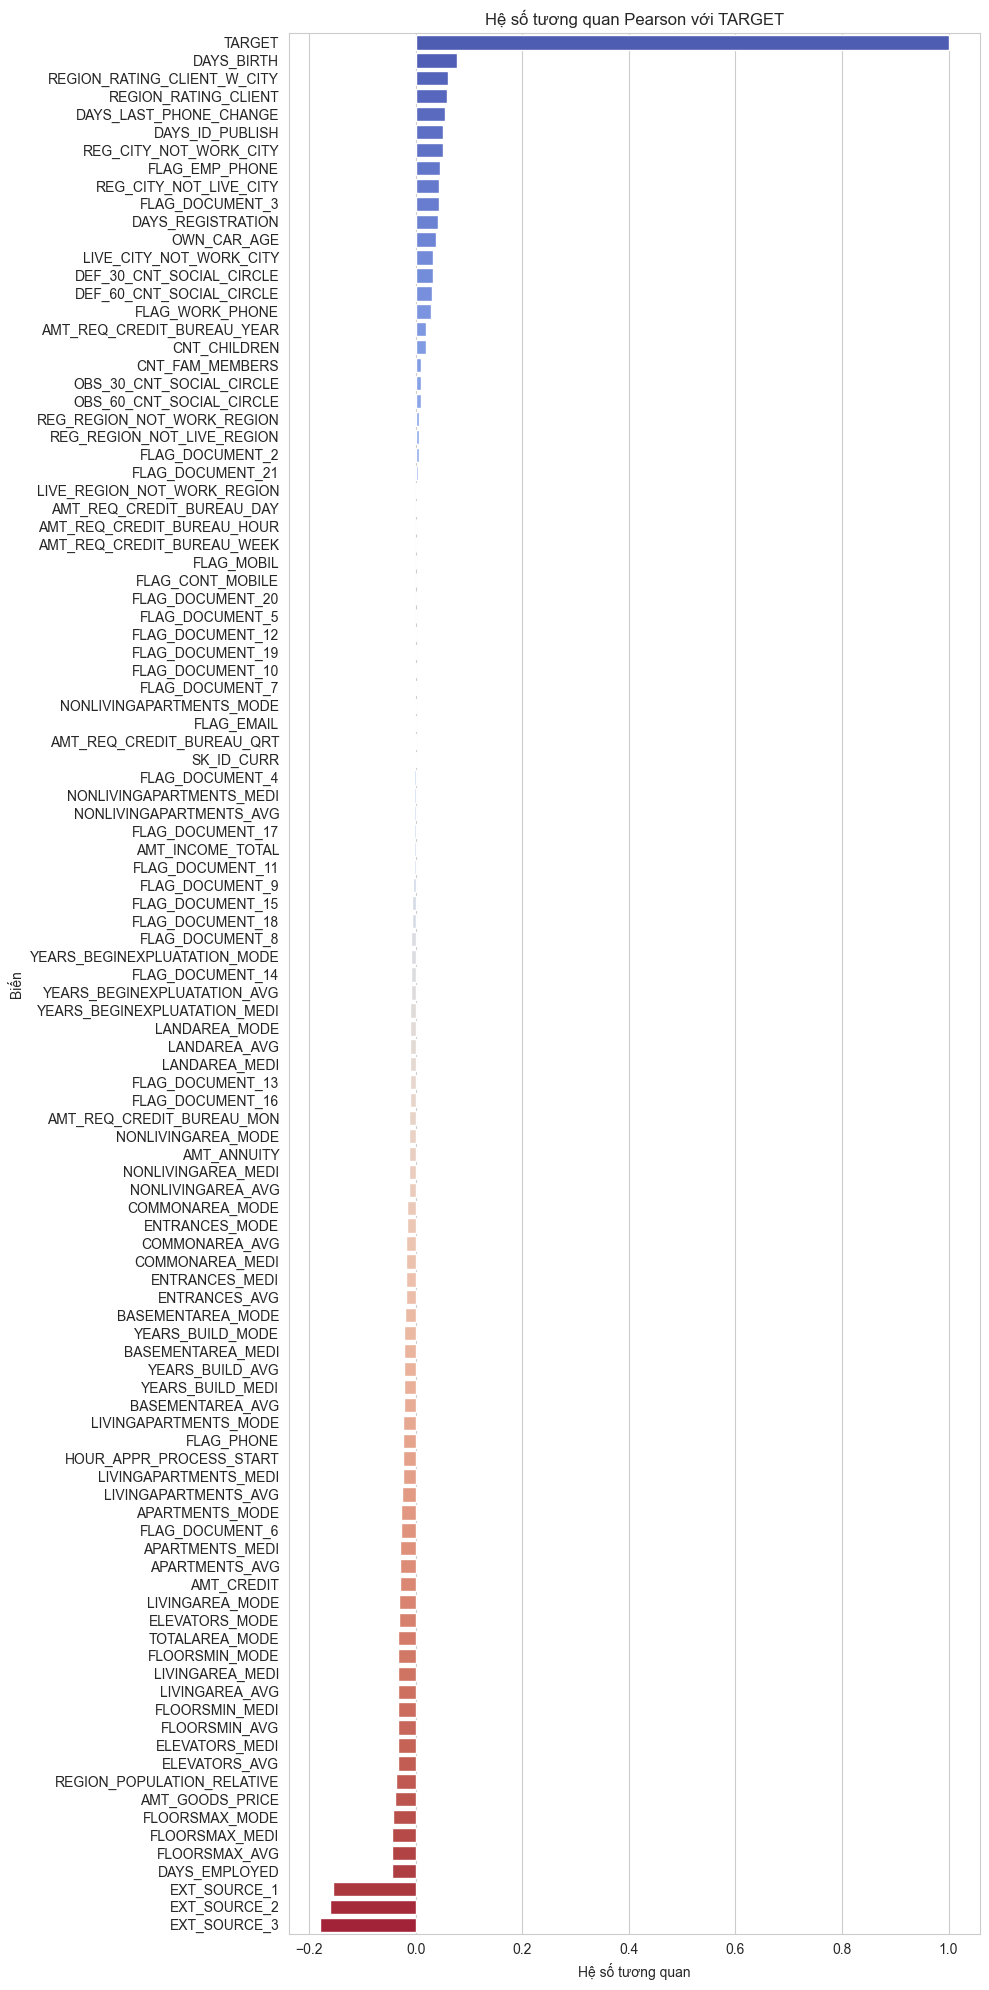


Đề xuất loại bỏ các cột có tương quan thấp (< 0.05) và tỷ lệ missing cao (> 50%):
['OWN_CAR_AGE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'COMMONAREA_MODE', 'ENTRANCES_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'BASEMENTAREA_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'LIVINGAREA_MODE', 'ELEVATORS_MODE', 'FLOORSMIN_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_AVG']


In [ ]:
# Lọc các cột số (numeric) để tính tương quan
numeric_cols = application_train.select_dtypes(include=['float64', 'int64']).columns
numeric_data = application_train[numeric_cols]

# Tính hệ số tương quan Pearson với TARGET
correlations = numeric_data.corr()['TARGET'].sort_values(ascending=False)

# In ra các tương quan
print("Tương quan với TARGET (sắp xếp giảm dần):")
print(correlations)

# Lọc các cột có tỷ lệ giá trị thiếu
missing = application_train.isnull().sum() / len(application_train) * 100
missing_cols = missing[missing > 0].index

# Kiểm tra tương quan của các cột có giá trị thiếu
print("\nTương quan của các cột có giá trị thiếu với TARGET:")
missing_correlations = correlations[correlations.index.isin(missing_cols)]
print(missing_correlations)

# Trực quan hóa tương quan
plt.figure(figsize=(10, 20))
sns.barplot(y=correlations.index, x=correlations.values, palette='coolwarm')
plt.title('Hệ số tương quan Pearson với TARGET')
plt.xlabel('Hệ số tương quan')
plt.ylabel('Biến')
plt.tight_layout()
plt.show()

# Đề xuất loại bỏ các cột
threshold = 0.05  # Ngưỡng tương quan thấp
low_corr_cols = correlations[abs(correlations) < threshold].index
high_missing_low_corr = [col for col in low_corr_cols if col in missing_cols and missing[col] > 50]

print("\nĐề xuất loại bỏ các cột có tương quan thấp (< 0.05) và tỷ lệ missing cao (> 50%):")
print(high_missing_low_corr)

Nhận xét: 
* Tương quan DƯƠNG: Các biến EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 và DAYS_EMPLOYED có mối tương quan âm mạnh với biến TARGET, là các yếu tố dự báo tăng TARGET rõ rệt nhất. Trong bối cảnh phân tích tín dụng (thường gặp), nếu TARGET=1 là "vỡ nợ", thì điểm số từ các nguồn này càng cao, khả năng vỡ nợ càng cao.
* Tương quan ÂM: Biến DAYS_BIRTH, đây là biến có tương quan âm mạnh nhất. (Trong nhiều bộ dữ liệu, biến này được tính là số ngày trước ngày hiện tại, nên giá trị càng âm (lớn) nghĩa là càng lớn tuổi. Tương quan âm ở đây có thể có nghĩa là: Càng lớn tuổi, khả năng TARGET (ví dụ: vỡ nợ) càng thấp). Các biến REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH có tương quan âm là những yếu tố dự báo quan trọng cho việc TARGET giảm.

# Missing value

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    data_types = data.dtypes
    return pd.concat([total, percent, data_types], axis=1, keys=['Total', 'Percent', 'Data Types'])

### application_train

In [ ]:
missing_values = missing_data(application_train)
print("So luong cot bi thieu:", len(missing_values[missing_values['Total'] > 0]))
print("\nTop 10 cot bi thieu nhieu nhat:")
print(missing_values.head(10))

So luong cot bi thieu: 67

Top 10 cot bi thieu nhieu nhat:
                           Total    Percent Data Types
COMMONAREA_AVG            214865  69.872297    float64
COMMONAREA_MODE           214865  69.872297    float64
COMMONAREA_MEDI           214865  69.872297    float64
NONLIVINGAPARTMENTS_MEDI  213514  69.432963    float64
NONLIVINGAPARTMENTS_MODE  213514  69.432963    float64
NONLIVINGAPARTMENTS_AVG   213514  69.432963    float64
FONDKAPREMONT_MODE        210295  68.386172     object
LIVINGAPARTMENTS_AVG      210199  68.354953    float64
LIVINGAPARTMENTS_MEDI     210199  68.354953    float64
LIVINGAPARTMENTS_MODE     210199  68.354953    float64


### application_test

In [ ]:
missing_values = missing_data(application_test)

print("So luong cot bi thieu:", len(missing_values[missing_values['Total'] > 0]))
print("\nTop 10 cot bi thieu nhieu nhat:")
print(missing_values.head(10))


So luong cot bi thieu: 64

Top 10 cot bi thieu nhieu nhat:
                          Total    Percent
COMMONAREA_AVG            33495  68.716150
COMMONAREA_MEDI           33495  68.716150
COMMONAREA_MODE           33495  68.716150
NONLIVINGAPARTMENTS_AVG   33347  68.412523
NONLIVINGAPARTMENTS_MEDI  33347  68.412523
NONLIVINGAPARTMENTS_MODE  33347  68.412523
FONDKAPREMONT_MODE        32797  67.284179
LIVINGAPARTMENTS_MEDI     32780  67.249302
LIVINGAPARTMENTS_AVG      32780  67.249302
LIVINGAPARTMENTS_MODE     32780  67.249302


### bureau

In [ ]:
missing_values = missing_data(bureau)

print("So luong cot bi thieu:", len(missing_values[missing_values['Total'] > 0]))
print("\nTop 10 cot bi thieu nhieu nhat:")
print(missing_values.head(20))

So luong cot bi thieu: 7

Top 10 cot bi thieu nhieu nhat:
                          Total    Percent Data Types
AMT_ANNUITY             1226791  71.473490    float64
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264    float64
DAYS_ENDDATE_FACT        633653  36.916958    float64
AMT_CREDIT_SUM_LIMIT     591780  34.477415    float64
AMT_CREDIT_SUM_DEBT      257669  15.011932    float64
DAYS_CREDIT_ENDDATE      105553   6.149573    float64
AMT_CREDIT_SUM               13   0.000757    float64
SK_ID_CURR                    0   0.000000      int64
SK_ID_BUREAU                  0   0.000000      int64
CREDIT_DAY_OVERDUE            0   0.000000      int64
CREDIT_ACTIVE                 0   0.000000     object
CREDIT_CURRENCY               0   0.000000     object
DAYS_CREDIT                   0   0.000000      int64
CNT_CREDIT_PROLONG            0   0.000000      int64
AMT_CREDIT_SUM_OVERDUE        0   0.000000    float64
CREDIT_TYPE                   0   0.000000     object
DAYS_CREDIT_UPDATE      


### bureau_balance

In [ ]:
missing_values = missing_data(bureau_balance)

print("So luong cot bi thieu:", len(missing_values[missing_values['Total'] > 0]))
print("\nTop 10 cot bi thieu nhieu nhat:")
print(missing_values.head(10))

So luong cot bi thieu: 0

Top 10 cot bi thieu nhieu nhat:
                Total  Percent
SK_ID_BUREAU        0      0.0
MONTHS_BALANCE      0      0.0
STATUS              0      0.0


### credit_card_balance

In [ ]:
missing_values = missing_data(credit_card_balance)

print("So luong cot bi thieu:", len(missing_values[missing_values['Total'] > 0]))
print("\nTop 10 cot bi thieu nhieu nhat:")
print(missing_values.head(10))

So luong cot bi thieu: 9

Top 10 cot bi thieu nhieu nhat:
                             Total    Percent Data Types
AMT_PAYMENT_CURRENT         767988  19.998063    float64
CNT_DRAWINGS_POS_CURRENT    749816  19.524872    float64
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872    float64
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872    float64
AMT_DRAWINGS_POS_CURRENT    749816  19.524872    float64
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872    float64
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872    float64
CNT_INSTALMENT_MATURE_CUM   305236   7.948208    float64
AMT_INST_MIN_REGULARITY     305236   7.948208    float64
AMT_DRAWINGS_CURRENT             0   0.000000    float64


### installments_payments

In [ ]:
missing_values = missing_data(installments_payments)
print("So luong cot bi thieu:", len(missing_values[missing_values['Total'] > 0]))
print("\nTop 10 cot bi thieu nhieu nhat:")
print(missing_values.head(10))

So luong cot bi thieu: 2

Top 10 cot bi thieu nhieu nhat:
                        Total   Percent Data Types
AMT_PAYMENT              2905  0.021352    float64
DAYS_ENTRY_PAYMENT       2905  0.021352    float64
SK_ID_PREV                  0  0.000000      int64
SK_ID_CURR                  0  0.000000      int64
NUM_INSTALMENT_NUMBER       0  0.000000      int64
NUM_INSTALMENT_VERSION      0  0.000000    float64
DAYS_INSTALMENT             0  0.000000    float64
AMT_INSTALMENT              0  0.000000    float64


### previous_applications

In [ ]:
missing_values = missing_data(previous_application)

print("So luong cot bi thieu:", len(missing_values[missing_values['Total'] > 0]))
print("\nTop 10 cot bi thieu nhieu nhat:")
print(missing_values.head(16))

So luong cot bi thieu: 16

Top 10 cot bi thieu nhieu nhat:
                             Total    Percent Data Types
RATE_INTEREST_PRIVILEGED   1664263  99.643698    float64
RATE_INTEREST_PRIMARY      1664263  99.643698    float64
AMT_DOWN_PAYMENT            895844  53.636480    float64
RATE_DOWN_PAYMENT           895844  53.636480    float64
NAME_TYPE_SUITE             820405  49.119754     object
DAYS_TERMINATION            673065  40.298129    float64
DAYS_FIRST_DRAWING          673065  40.298129    float64
DAYS_FIRST_DUE              673065  40.298129    float64
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129    float64
DAYS_LAST_DUE               673065  40.298129    float64
NFLAG_INSURED_ON_APPROVAL   673065  40.298129    float64
AMT_GOODS_PRICE             385515  23.081773    float64
AMT_ANNUITY                 372235  22.286665    float64
CNT_PAYMENT                 372230  22.286366    float64
PRODUCT_COMBINATION            346   0.020716     object
AMT_CREDIT                   

### POS_CASH_balance

In [ ]:
missing_values = missing_data(POS_CASH_balance)

print("So luong cot bi thieu:", len(missing_values[missing_values['Total'] > 0]))
print("\nTop 10 cot bi thieu nhieu nhat:")
print(missing_values.head(10))

So luong cot bi thieu: 2

Top 10 cot bi thieu nhieu nhat:
                       Total   Percent Data Types
CNT_INSTALMENT_FUTURE  26087  0.260835    float64
CNT_INSTALMENT         26071  0.260675    float64
SK_ID_CURR                 0  0.000000      int64
SK_ID_PREV                 0  0.000000      int64
MONTHS_BALANCE             0  0.000000      int64
NAME_CONTRACT_STATUS       0  0.000000     object
SK_DPD                     0  0.000000      int64
SK_DPD_DEF                 0  0.000000      int64



## Kiểm tra mất cân bằng dữ liệu

### Biến target

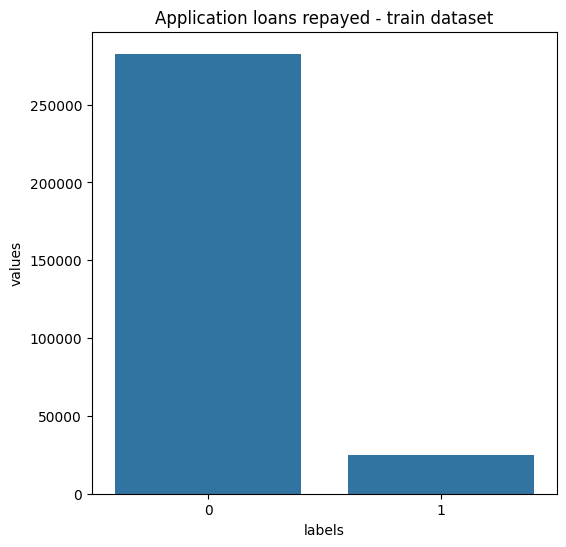

In [ ]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


Đây là một bộ dữ liệu bị mất cân bằng (imbalanced) một cách nghiêm trọng.

Kết luận: Bạn không thể sử dụng thước đo "Accuracy" (Độ chính xác) để đánh giá mô hình. Thay vào đó, bạn phải tập trung vào các thước đo như AUC-ROC, Precision, Recall, hoặc F1-Score và cần áp dụng các kỹ thuật xử lý mất cân bằng (như Oversampling nhóm "1" hoặc Undersampling nhóm "0").

### Tệp chính Applicatiion.csv

In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [ ]:
def plot_distribution(var):

    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

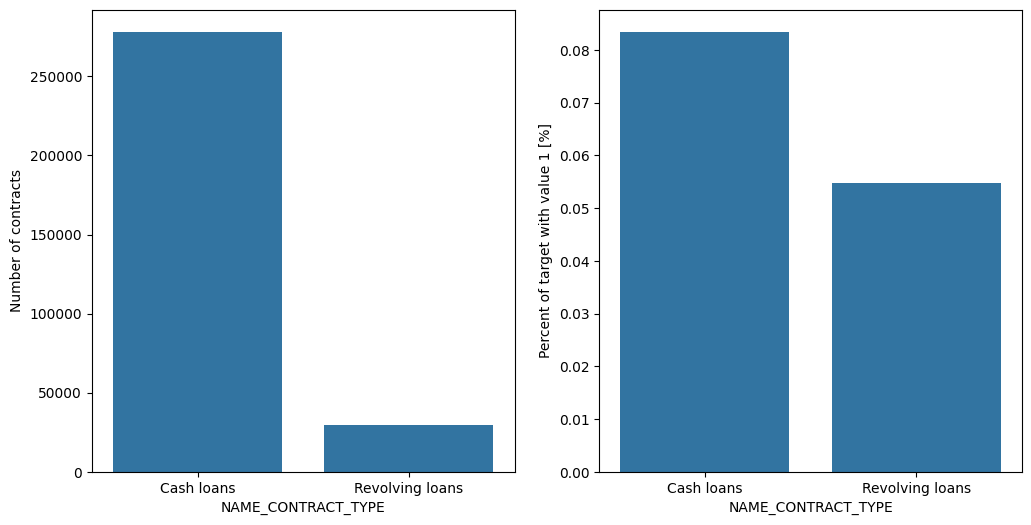

In [ ]:
plot_stats('NAME_CONTRACT_TYPE')

Loại hợp đồng Revolving loans (khoản vay quay vòng) chỉ chiếm một phần nhỏ (khoảng 10%) trong tổng số khoản vay.
Tuy nhiên, tỷ lệ các khoản vay quay vòng không được hoàn trả lại cao hơn đáng kể so với tần suất xuất hiện của chúng.
=> Mặc dù Revolving loans ít (chỉ chiếm 10%), nhưng tỷ lệ vỡ nợ trong nhóm này lại cao hơn bình thường — tức là nhóm này rủi ro hơn so với các loại hợp đồng vay khác.

## Giới tính của khách hàng
Hãy xem phân bố giới tính của khách hàng và tỷ lệ các khoản vay không được hoàn trả (TARGET = 1) theo từng giới tính.
Cụ thể:
Biểu đồ thứ nhất: thể hiện số lượng hoặc tỷ lệ khách hàng nam và nữ trong toàn bộ dữ liệu.
Biểu đồ thứ hai: thể hiện tỷ lệ phần trăm các khoản vay bị vỡ nợ (TARGET = 1) theo từng giới tính (nam/nữ).
=> Mục tiêu là so sánh xem giới tính nào có xu hướng không trả nợ cao hơn.

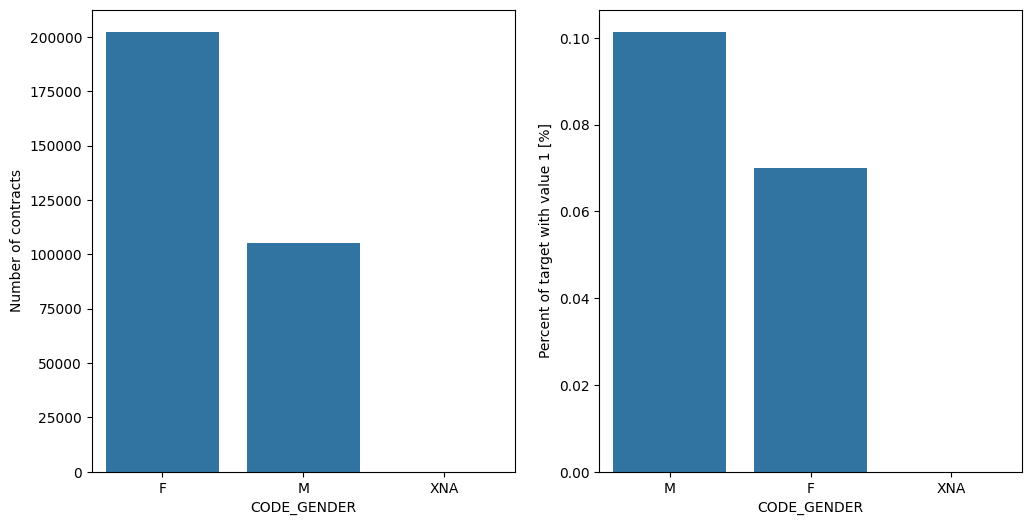

In [ ]:
plot_stats('CODE_GENDER')

Số lượng khách hàng nữ gần như gấp đôi số lượng khách hàng nam.
Tuy nhiên, khi xét về tỷ lệ các khoản vay bị vỡ nợ, nam giới có khả năng không trả nợ cao hơn (khoảng 10%) so với nữ giới (khoảng 7%).
Nói cách khác:
Phụ nữ vay nhiều hơn, nhưng đàn ông lại có tỷ lệ không trả nợ cao hơn → cho thấy giới tính có thể là một yếu tố ảnh hưởng đến rủi ro tín dụng.

### Flag own car and flag own real estate

Hãy kiểm tra **hai biến cờ (flag)** thể hiện việc **khách hàng có sở hữu xe hơi hoặc bất động sản hay không**, đồng thời vẽ **các biểu đồ riêng biệt** để xem:

* **Tỷ lệ khách hàng có và không có xe hơi / bất động sản** trong toàn bộ dữ liệu.
* **Tỷ lệ phần trăm các khoản vay bị vỡ nợ (TARGET = 1)** tương ứng với từng nhóm:

  * Có xe hơi vs. Không có xe hơi
  * Có bất động sản vs. Không có bất động sản

Mục tiêu:
Xem xét **mối quan hệ giữa việc sở hữu tài sản** (như xe hoặc nhà) **và khả năng hoàn trả khoản vay**, nhằm xác định **liệu người có tài sản có xu hướng trả nợ đúng hạn hơn không**.


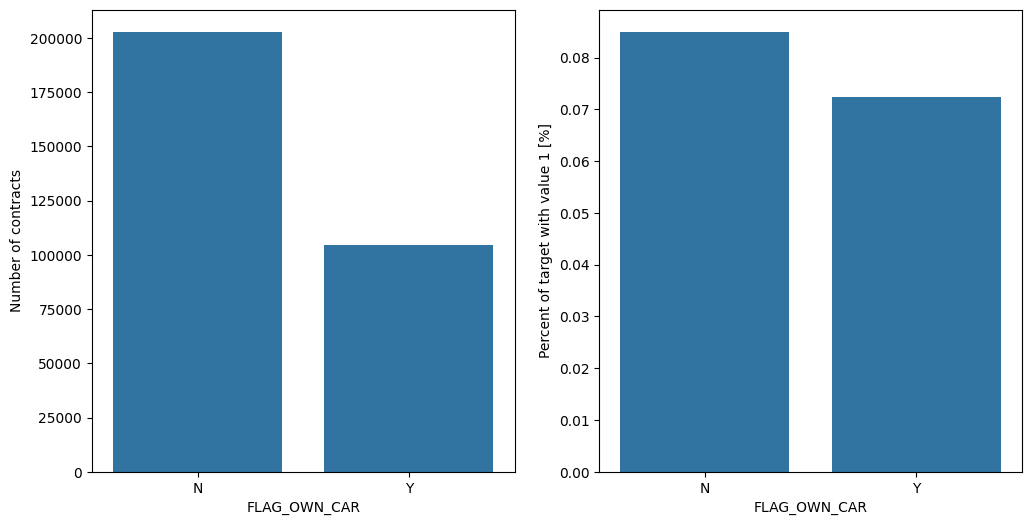

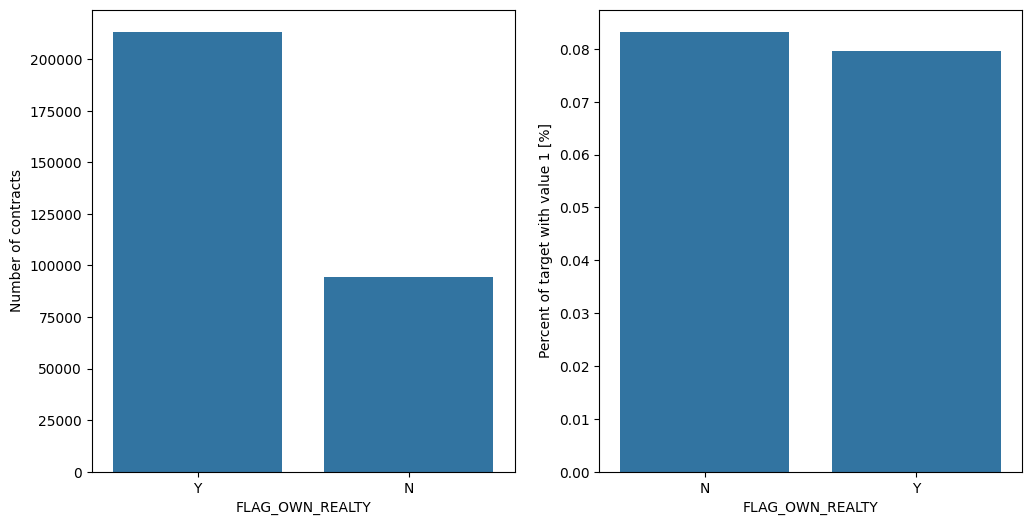

In [ ]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

Những khách hàng có sở hữu xe hơi chiếm khoảng một nửa so với những người không có xe.
Nhìn chung, người có xe hơi ít có khả năng không trả nợ hơn so với người không có xe, nhưng cả hai nhóm đều có tỷ lệ vỡ nợ khoảng 8%.

Trong khi đó, số khách hàng có sở hữu bất động sản lại hơn gấp đôi số người không có, và cả hai nhóm (có hoặc không có bất động sản) đều có tỷ lệ không hoàn trả khoản vay thấp hơn 8%.

### Family status of client

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


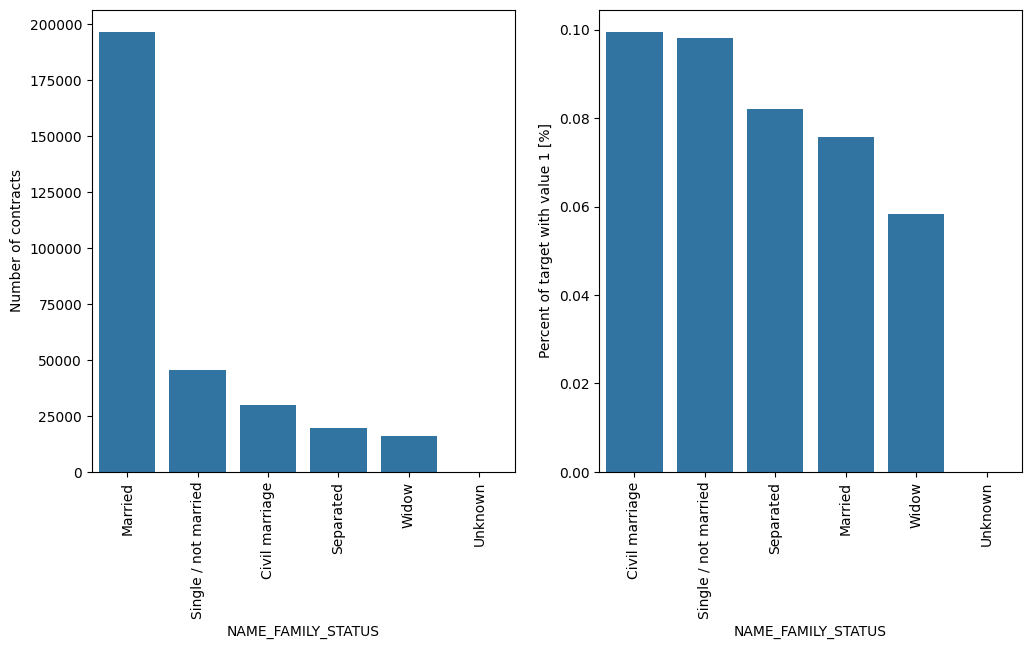

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Phần lớn khách hàng trong bộ dữ liệu là **đã kết hôn**, tiếp theo là nhóm **độc thân/chưa kết hôn** và **kết hôn dân sự (civil marriage)**.

Xét về **tỷ lệ không hoàn trả khoản vay**, nhóm **kết hôn dân sự (civil marriage)** có **tỷ lệ vỡ nợ cao nhất (~10%)**, trong khi nhóm **góa phụ (widow)** có **tỷ lệ thấp nhất** (ngoại trừ nhóm có tình trạng hôn nhân **không xác định – *Unknown***).

Tóm lại:

* **Tình trạng hôn nhân** có ảnh hưởng nhất định đến khả năng trả nợ.
* **Người đã kết hôn dân sự** có xu hướng **rủi ro tín dụng cao hơn**, trong khi **người góa chồng/vợ** thường **trả nợ đúng hạn hơn**.


### Number of children

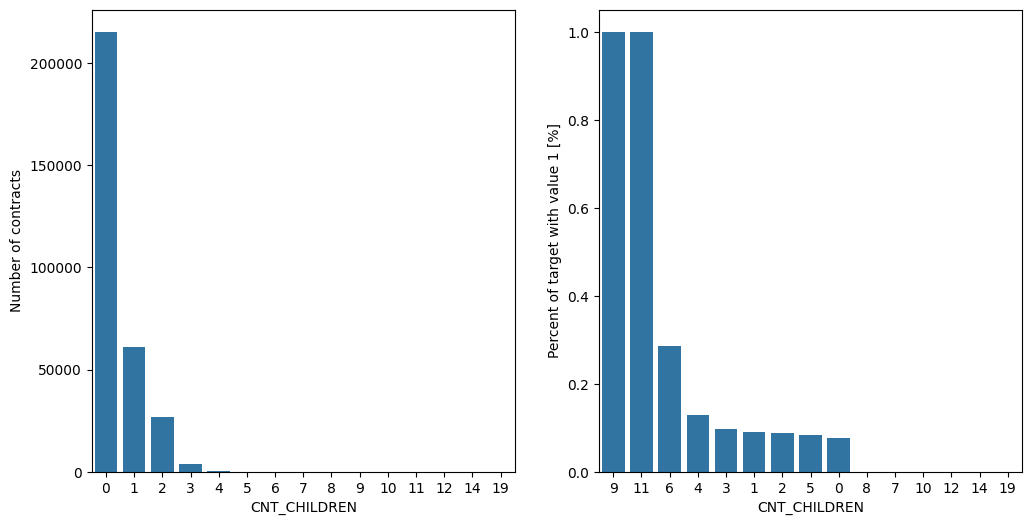

In [ ]:
plot_stats('CNT_CHILDREN')

Phần lớn khách hàng vay vốn **không có con**.
Số lượng khoản vay của **khách hàng có 1 con** ít hơn khoảng **4 lần**, và của **khách hàng có 2 con** ít hơn khoảng **8 lần** so với nhóm không có con.
Các trường hợp **có 3, 4 hoặc nhiều con hơn** thì **rất hiếm**.

Về **khả năng hoàn trả khoản vay**:

* Các nhóm **không có con**, **1 con**, **2 con**, **3 con** và **5 con** có **tỷ lệ vỡ nợ xấp xỉ mức trung bình (~10%)**.
* Nhóm **có 4 hoặc 6 con** lại có **tỷ lệ không hoàn trả cao hơn đáng kể**, **trên 25%** đối với gia đình có **6 con**.
* Đặc biệt, **những khách hàng có 9 hoặc 11 con** có **tỷ lệ không trả nợ lên đến 100%**.

👉 **Kết luận:**
Số lượng con cái càng nhiều, **rủi ro không trả nợ càng cao** — có thể do **gánh nặng tài chính lớn hơn**, dẫn đến **khả năng trả nợ giảm sút**.


### Number of family members of client

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


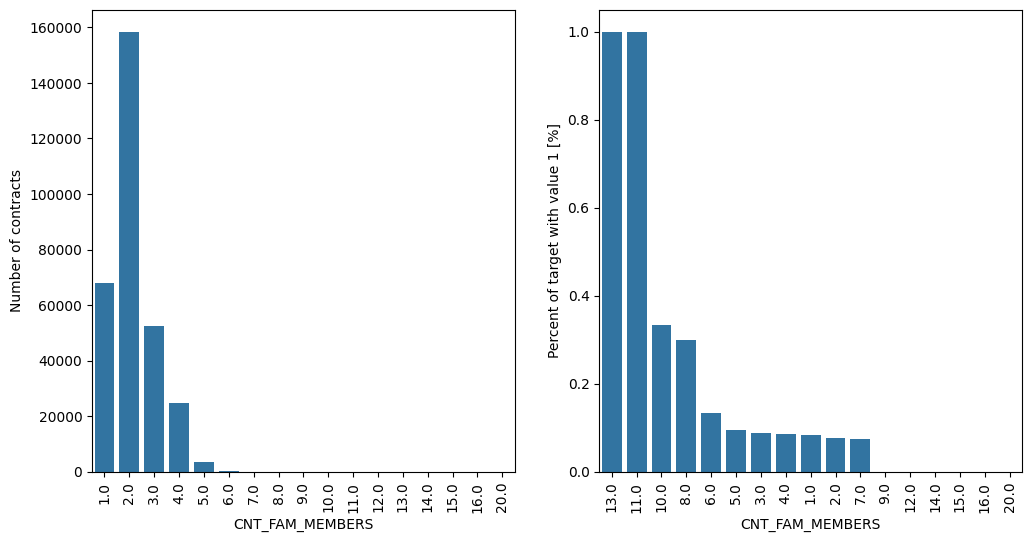

In [ ]:
plot_stats('CNT_FAM_MEMBERS',True)

Phần lớn khách hàng vay vốn có **quy mô gia đình gồm 2 người**, tiếp theo là nhóm **1 người (độc thân)**, **3 người (gia đình có 1 con)** và **4 người**.

Đối với **tỷ lệ không hoàn trả khoản vay**, các gia đình có **11 hoặc 13 thành viên** đều có **tỷ lệ vỡ nợ 100%**.
Những gia đình có **10 hoặc 8 thành viên** cũng có **tỷ lệ không hoàn trả trên 30%**.
Trong khi đó, các hộ có **từ 6 người trở xuống** có **tỷ lệ không hoàn trả** gần với **mức trung bình khoảng 10%**.

**Kết luận:**
Các hộ gia đình **càng đông người thì rủi ro tín dụng càng cao** — có thể do **gánh nặng chi phí sinh hoạt và tài chính lớn**, khiến **khả năng trả nợ giảm** so với các hộ nhỏ hơn.


### Income type of client

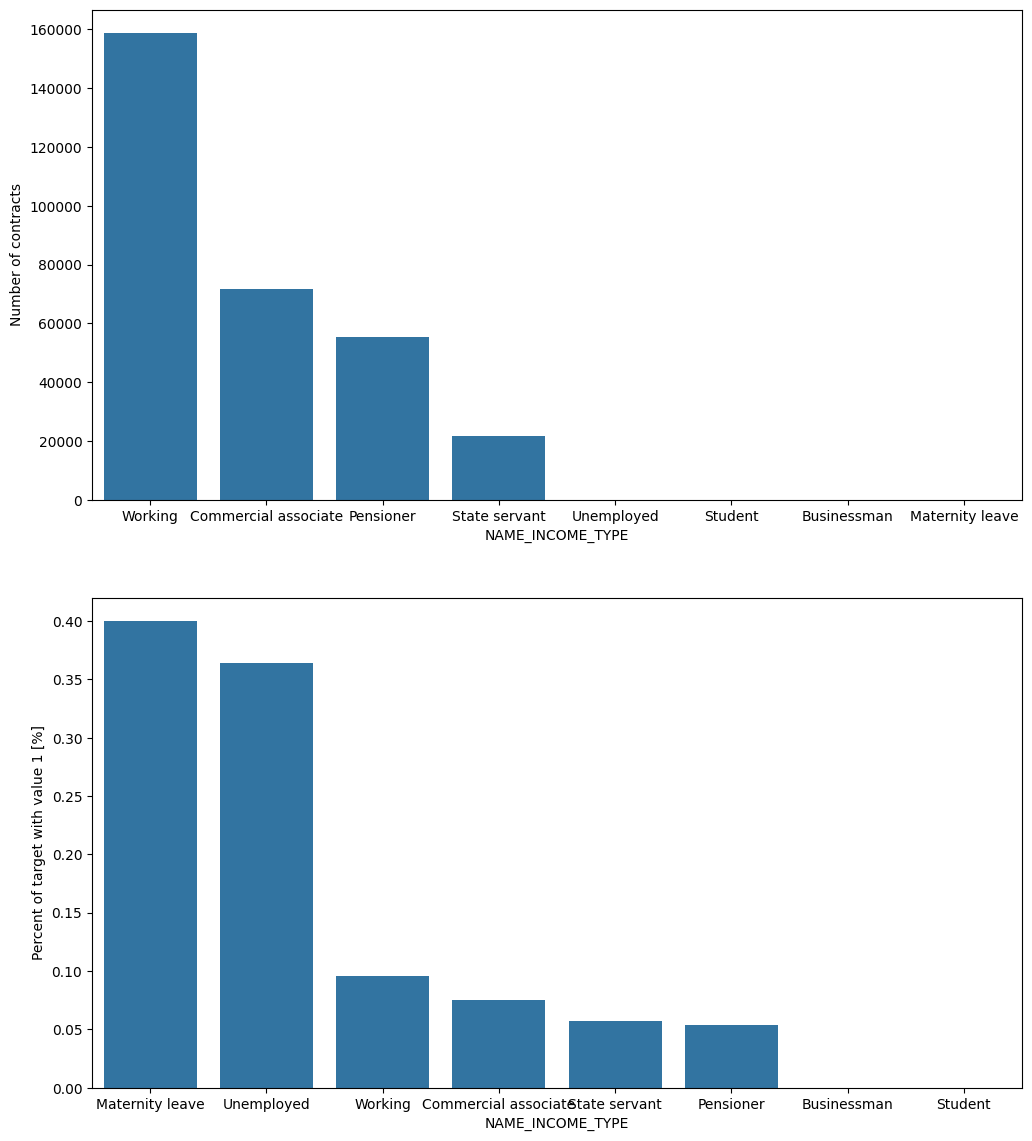

In [ ]:
plot_stats('NAME_INCOME_TYPE',False,False)

Phần lớn người vay vốn có nguồn thu nhập từ công việc làm công (Working), tiếp theo là các nhóm tự doanh/thương mại (Commercial associate), người nghỉ hưu (Pensioner) và nhân viên nhà nước (State servant).

Những người vay thuộc nhóm nghỉ thai sản (Maternity leave) có tỷ lệ không hoàn trả khoản vay gần 40%, cao nhất trong tất cả các nhóm.
Tiếp theo là nhóm thất nghiệp (Unemployed) với tỷ lệ khoảng 37%.
Các nhóm còn lại đều có tỷ lệ vỡ nợ dưới mức trung bình (~10%).

### Ocupation of client



C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


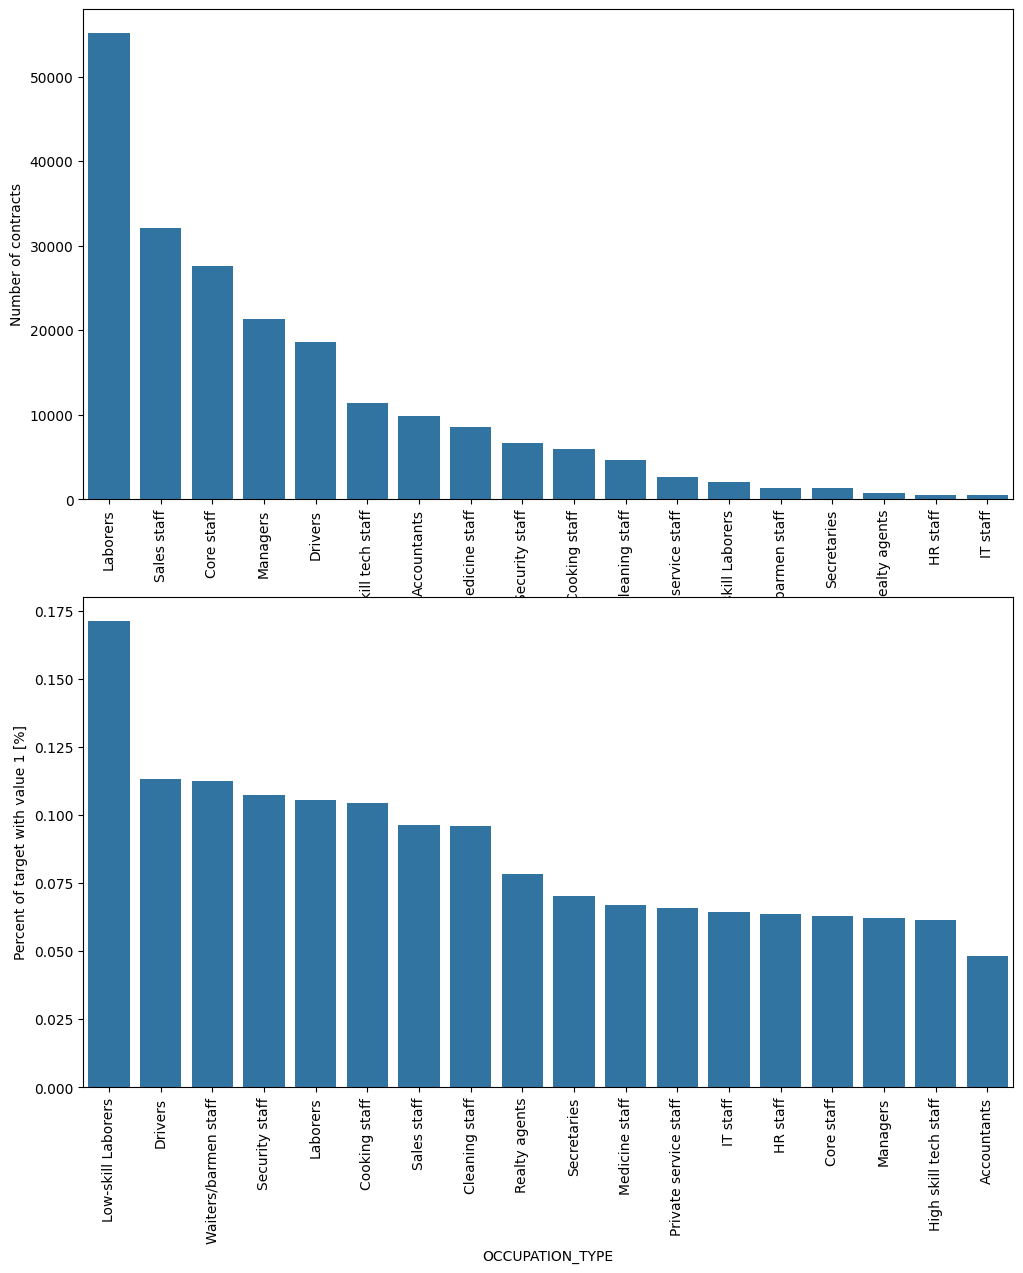

In [ ]:
plot_stats('OCCUPATION_TYPE',True, False)

Phần lớn các khoản vay được thực hiện bởi nhóm **lao động phổ thông (Laborers)**, tiếp theo là **nhân viên bán hàng (Sales staff)**.
Nhóm **nhân viên công nghệ thông tin (IT staff)** là nhóm **vay ít nhất**.

Xét về **tỷ lệ không hoàn trả khoản vay**, nhóm có **tỷ lệ vỡ nợ cao nhất** là **lao động kỹ năng thấp (Low-skill Laborers)** — **trên 17%**, tiếp theo là các nhóm **tài xế (Drivers)**, **phục vụ/quầy bar (Waiters/Barmen staff)**, **bảo vệ (Security staff)**, **lao động phổ thông (Laborers)** và **nhân viên nấu ăn (Cooking staff)**.

**Kết luận:**
Các nghề có **mức thu nhập thấp, công việc không ổn định hoặc mang tính tay chân cao** thường có **rủi ro tín dụng lớn hơn**, trong khi **những nghề có thu nhập ổn định như IT hoặc nhân viên văn phòng** có **khả năng trả nợ tốt hơn**.


### Organization type

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


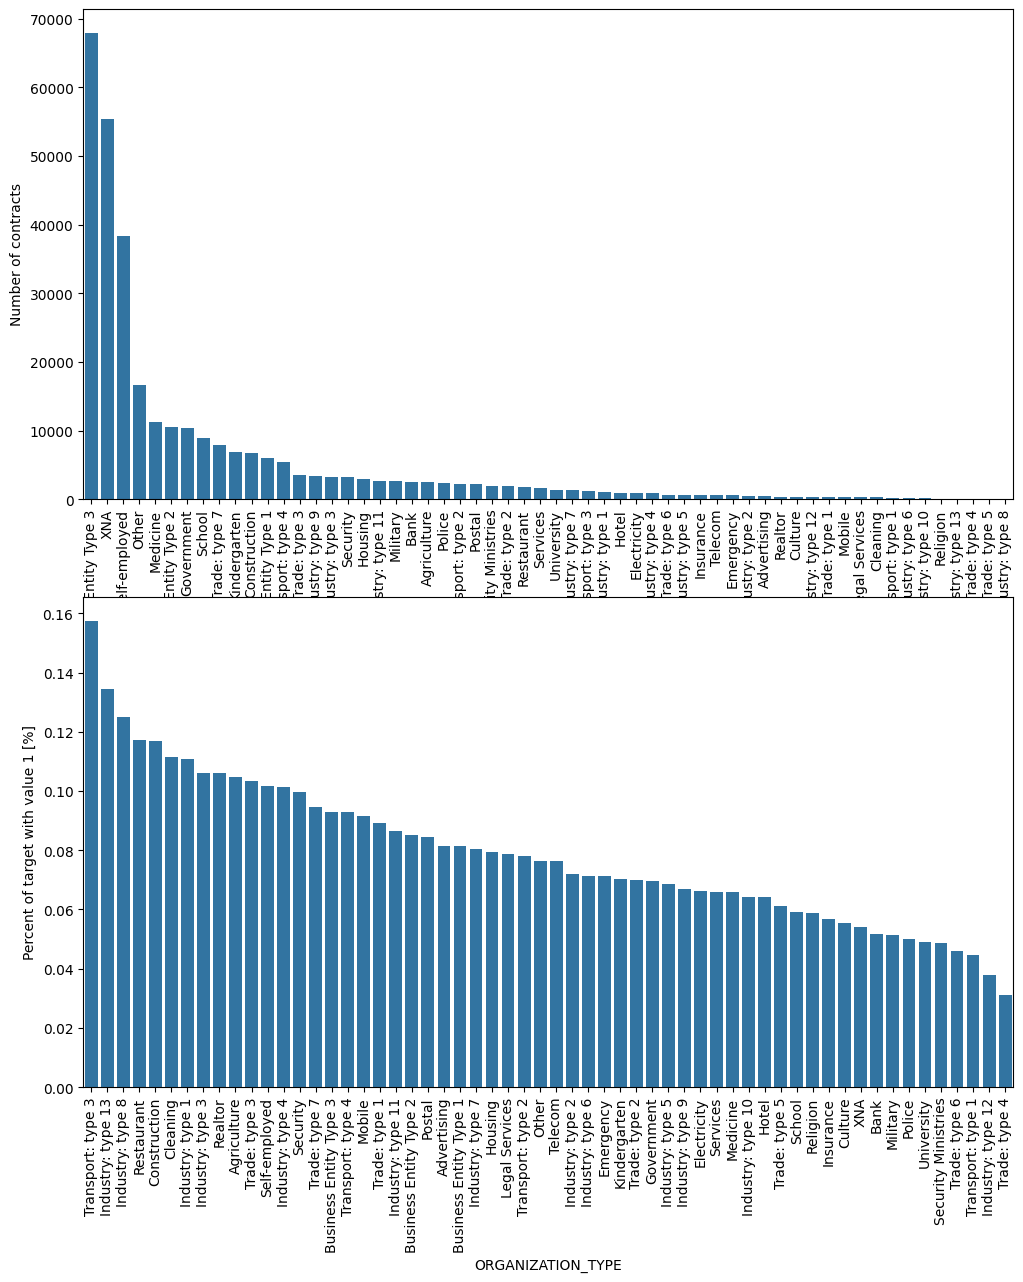

In [ ]:
plot_stats('ORGANIZATION_TYPE',True, False)

Các **tổ chức có tỷ lệ khoản vay không được hoàn trả cao nhất** gồm:

* **Transport: type 3** – khoảng **16%**
* **Industry: type 13** – khoảng **13,5%**
* **Industry: type 8** – khoảng **12,5%**
* **Restaurant** – dưới **12%**

**Kết luận:**
Các doanh nghiệp hoạt động trong **ngành vận tải và công nghiệp** có **tỷ lệ vỡ nợ cao hơn trung bình**, cho thấy đây là những lĩnh vực **tiềm ẩn nhiều rủi ro tài chính**, có thể do **biến động kinh tế, chi phí vận hành lớn hoặc thu nhập không ổn định**.
Trong khi đó, **ngành nhà hàng (Restaurant)** tuy có rủi ro nhưng **thấp hơn một chút** so với các ngành trên.


### Education type of the client

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


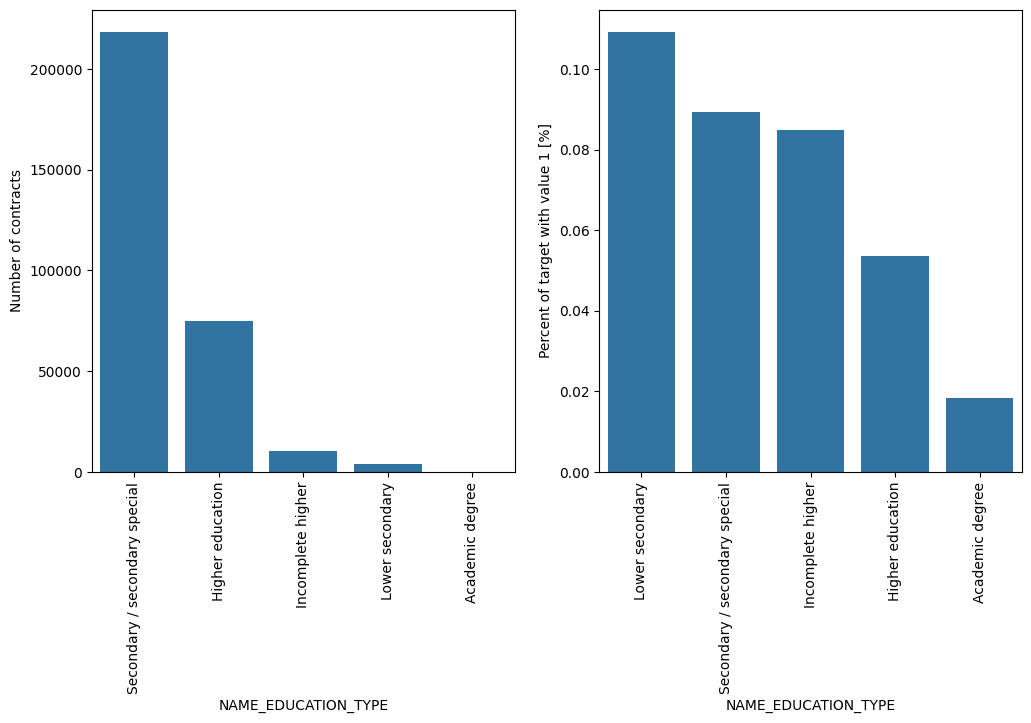

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

Phần lớn khách hàng có **trình độ Trung học / Trung học chuyên nghiệp (Secondary / Secondary special)**, tiếp theo là nhóm có **trình độ Đại học (Higher education)**.
Chỉ có **một số rất ít** khách hàng có **học vị học thuật (Academic degree)**.

Về **tỷ lệ không hoàn trả khoản vay**:

* Nhóm **Trung học cơ sở (Lower secondary)** tuy chiếm tỷ lệ rất nhỏ nhưng lại có **tỷ lệ vỡ nợ cao nhất (~11%)**.
* Trong khi đó, nhóm **có học vị học thuật (Academic degree)** có **tỷ lệ không trả nợ thấp nhất, dưới 2%**.

**Kết luận:**
Trình độ học vấn càng cao, **rủi ro tín dụng càng thấp** — điều này có thể do **người có học vấn cao thường có việc làm ổn định, thu nhập tốt và khả năng quản lý tài chính cao hơn**.


### Type of the housing of client

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1910514961.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


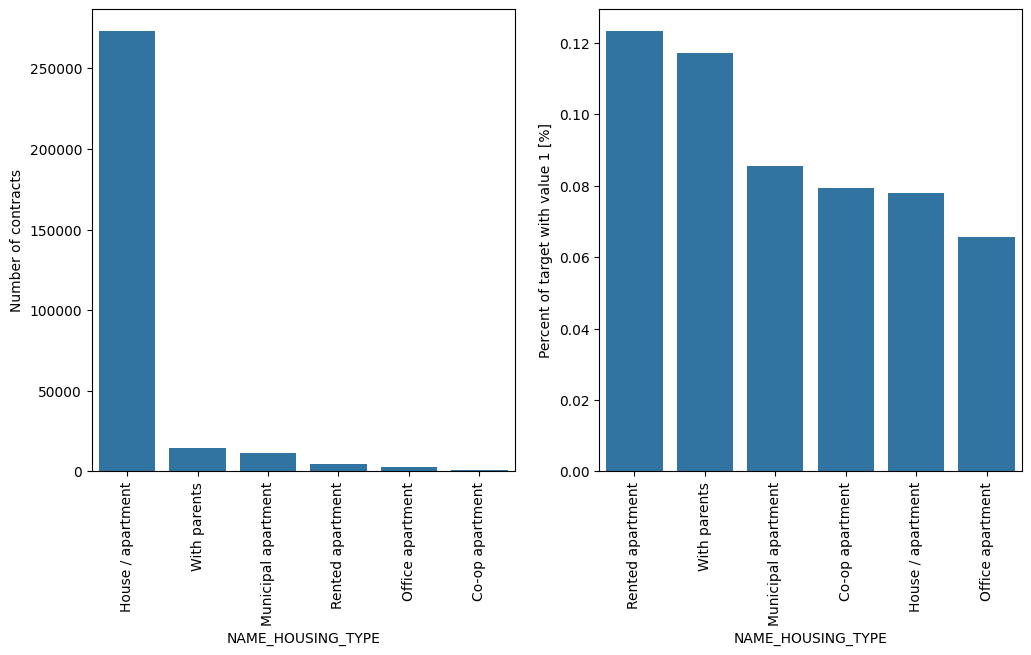

In [ ]:
plot_stats('NAME_HOUSING_TYPE',True)

Hơn **250.000 khách hàng vay vốn** đã **đăng ký nơi ở** của họ là **nhà hoặc căn hộ riêng (House/apartment)**.
Các nhóm còn lại như **sống cùng cha mẹ (With parents)** hay **căn hộ thuộc sở hữu nhà nước (Municipal apartment)** có **số lượng khách hàng rất ít**.

Trong số các nhóm này, hai loại **“Rented apartment” (căn hộ thuê)** và **“With parents” (sống cùng cha mẹ)** có **tỷ lệ không hoàn trả khoản vay cao hơn 10%**.

 **Kết luận:**
Khách hàng **sở hữu nhà riêng** có xu hướng **trả nợ đúng hạn hơn**, trong khi **người thuê nhà hoặc sống cùng cha mẹ** có **rủi ro vỡ nợ cao hơn**, có thể do **thu nhập chưa ổn định hoặc khả năng tài chính hạn chế**.


### Total income distribution

In [ ]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):

    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\2489922889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


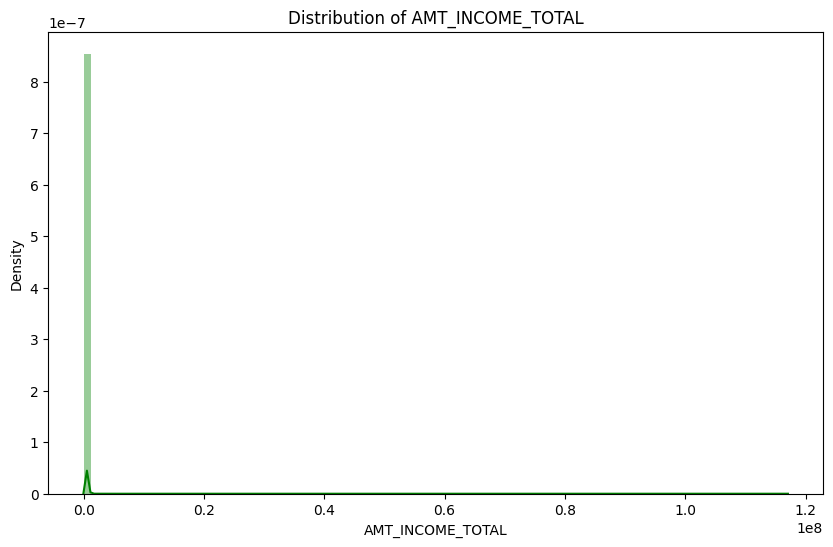

In [ ]:
plot_distribution('AMT_INCOME_TOTAL','green')

Dữ liệu lệch tập trung ở thu nhập thấp: Đại đa số khách hàng của bạn có mức thu nhập tương đối thấp và tập trung trong một khoảng hẹp.

Tồn tại "Outliers" (Ngoại lệ): Có một số rất ít khách hàng có thu nhập cực kỳ cao (ví dụ 20 triệu, 40 triệu... 120 triệu). Chính những giá trị ngoại lệ này đã "kéo dãn" biểu đồ ra, khiến phần đông bị dồn về một góc.

=> Dữ liệu thống kê sẽ bị ảnh hưởng bới một số outlier

### Credit distribution

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\2489922889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


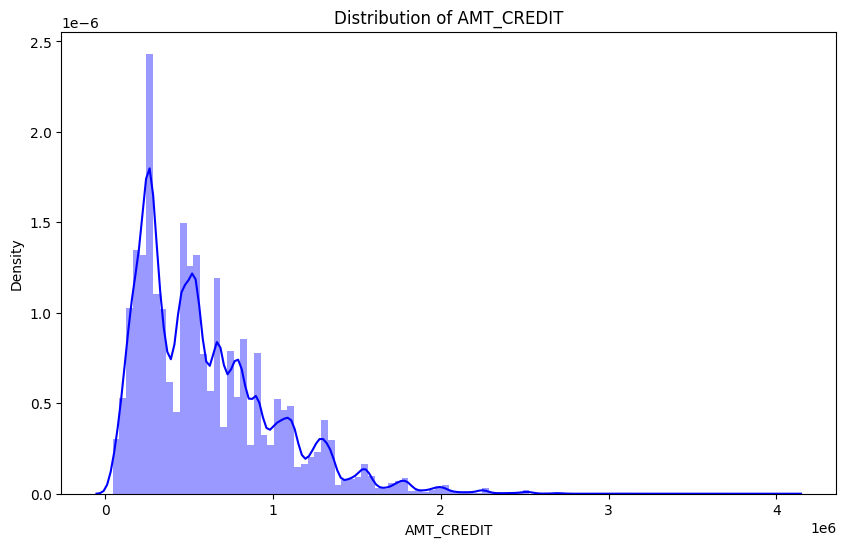

In [ ]:
plot_distribution('AMT_CREDIT','blue')

* Biểu đồ này cho thấy dữ liệu bị lệch phải (right-skewed). Điều này có nghĩa là:
* * Phần lớn các khoản vay có giá trị nhỏ, cột cao nhất tập trung ở phía bên trái của biểu đồ cho thấy hầu hết các khoản vay đều dưới 1,000,000.
* * Ta thấy có gia trị ngoại lai xuất hiện là một số ít các khoản vay có giá trị rất lớn, thấy được thông qua phần "đuôi dài" (long tail) của biểu đồ kéo dài về phía bên phải
* Kết luận: Hầu hết khách hàng vay các khoản tiền tương đối nhỏ, trong khi chỉ một số ít khách hàng vay các khoản tiền rất lớn.

ẢNH HƯỞNG ĐẾN MÔ HÌNH:
* Làm lệch dữ liệu thống kê
* Làm giảm hiệu suất của nhiều mô hình: Các mô hình nhạy cảm với thang đo và phân phối của dữ liệu sẽ hoạt động rất kém.

### Annuity distribution

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\2489922889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


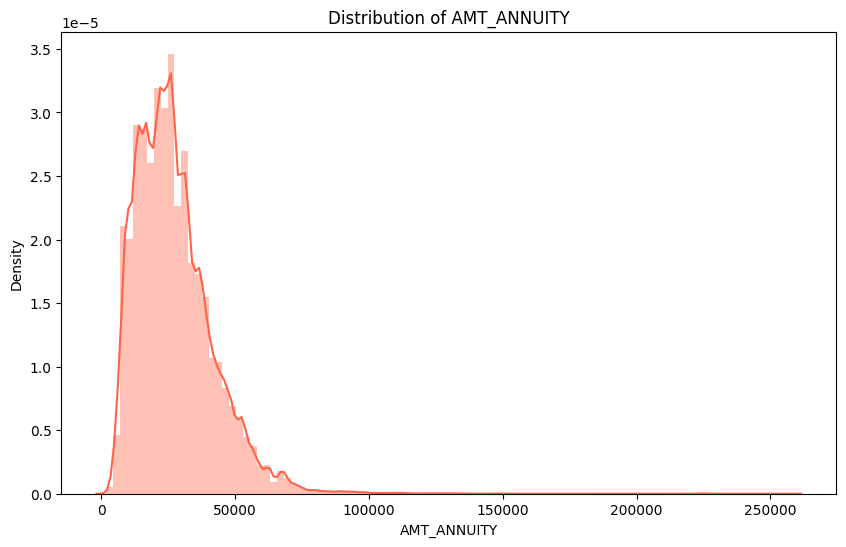

In [ ]:
plot_distribution('AMT_ANNUITY','tomato')

* Biểu đồ phân phối lệch phải (right-skewed).
* Phần lớn các khoản trả góp hàng năm (AMT_ANNUITY) tập trung ở phía bên trái của biểu đồ, chủ yếu trong khoảng từ 0 đến 50,000. Cao nhất ở khoảng 20,000 - 30,000. Có một vài khoản vay có mức trả góp hàng năm rất cao (lên đến 150,000, 200,000 và hơn thế nữa).
* Ý nghĩa: Hầu hết khách hàng trong bộ dữ liệu này chỉ trả một khoản tiền trả góp hàng năm tương đối n tuy nhỏ.  Tuy nhiên tồn tại một nhóm khách hàng "ngoại lệ" có khoản vay lớn, dẫn đến việc họ phải trả góp hàng năm với số tiền cao bất thường so vơi mặt bằng chung

=> Cần xử lý outlier 

### Goods price


C:\Users\pc\AppData\Local\Temp\ipykernel_17476\2489922889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


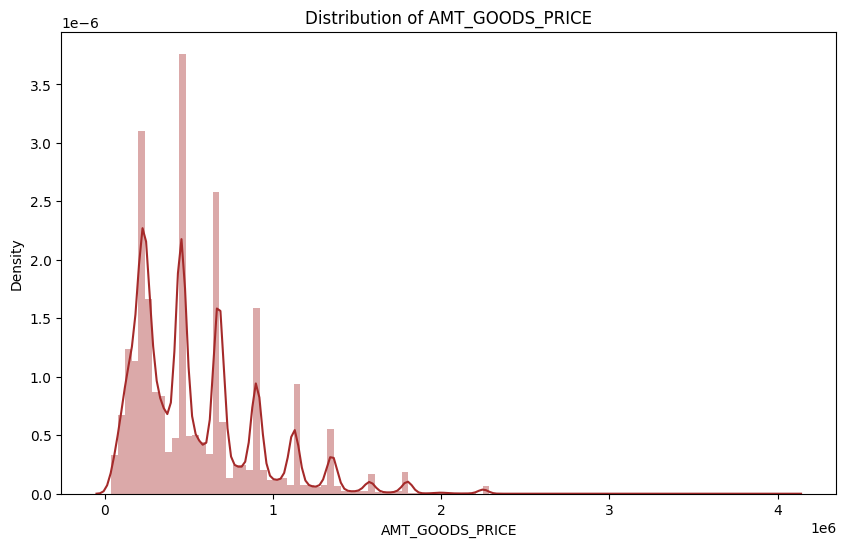

In [ ]:
plot_distribution('AMT_GOODS_PRICE','brown')

* Lệch phải (Right-skewed) hầu hết các khoản vay được dùng để mua hàng hóa có giá trị thấp đến trung bình (phần lớn tập trung ở bên trái, dưới 1 triệu). Có một số ít khoản vay cho hàng hóa rất đắt tiền (phần đuôi kéo dài về bên phải).
* Phân phối Đa đỉnh (Multimodal): hách hàng không vay tiền để mua hàng ở một mức giá ngẫu nhiên. Các đỉnh này đại diện cho các mức giá tiêu chuẩn, phổ biến của hàng hóa trên thị trường (ví dụ: giá của một chiếc xe máy mới, giá một chiếc ô tô đã qua sử dụng, giá một bộ đồ gia dụng, v.v.).

### Days from birth distribution

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\2489922889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


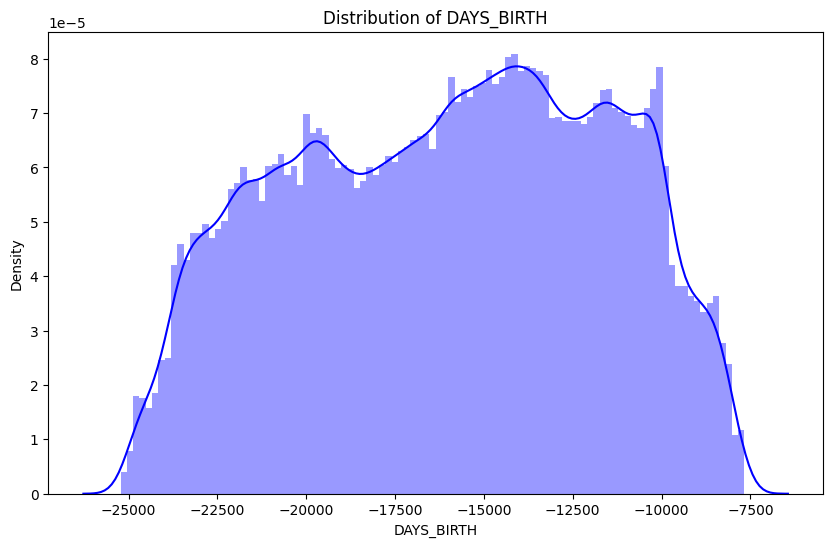

In [ ]:
plot_distribution('DAYS_BIRTH','blue')

* Cột ngày thể hiện Tuổi của khách hàng tính theo ngày tại thời điểm nộp đơn có nghĩa Tuổi của họ tại đúng thời điểm họ nộp hồ sơ vay

Biểu đồ này bị lệch trái (left-skewed). Điều này có nghĩa là:
* Đa số khách hàng là người trẻ tuổi: Mật độ (độ cao của đường cong) cao nhất ở phía bên phải. Điều này cho thấy nhóm khách hàng đông đảo nhất là những người trẻ tuổi, khoảng từ 20.5 đến 30 tuổi.
* Giới hạn độ tuổi tối thiểu: Có một "điểm cắt" rất rõ ràng ở bên phải (khoảng 20.5 tuổi). Điều này gần như chắc chắn là do yêu cầu về độ tuổi tối thiểu để vay tiền
* Số lượng giảm dần theo tuổi: Khi chúng ta di chuyển về bên trái (tuổi tăng lên), mật độ khách hàng giảm dần. Điều này có nghĩa là số lượng khách hàng ở độ tuổi 40, 50, và 60+ ít hơn đáng kê so với nhóm khách hàng trẻ.

Kết luận: Tệp khách hàng vay tiền này chủ yếu là người trẻ tuổi. Càng lớn tuổi, số lượng khách hàng vay càng ít đi.



### Days employed distribution

Let's represent the distribution of number of days employed.

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\2489922889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


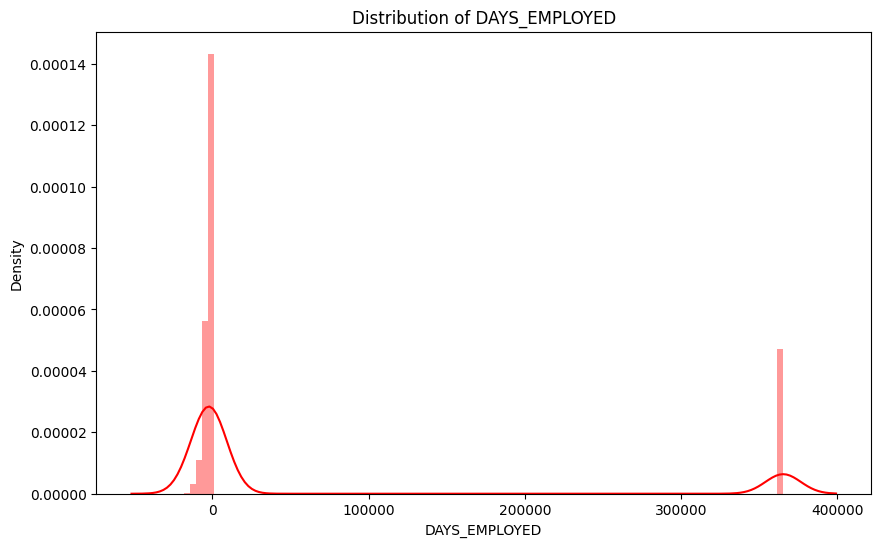

In [ ]:
plot_distribution('DAYS_EMPLOYED','red')


Các giá trị âm trong dữ liệu thể hiện khoảng thời gian làm việc của người đó tính đến ngày nộp đơn.
Tuy nhiên, các giá trị dương rất lớn ở phía cuối phân bố (tương ứng với hơn ~100 năm làm việc) không thực tế, có thể là dữ liệu bị lỗi, nhập sai hoặc mã hóa đặc biệt trong bộ dữ liệu. Có một đỉnh rất cao gần giá trị O → đa số người nộp đơn chỉ làm việc trong vài năm gần đây.

Kết luận 
* **Giá trị âm** thể hiện khoảng thời gian người đó đã làm việc tại công việc hiện tại tính đền ngày nộp đơn. Giá trị âm càng lớn (về độ tuyệt đổi) người đó càng có thâm niên làm việc lâu hơn tại công việc hiện tại.
* Biểu đồ phân phối DAYS_EMPLOYED cho thấy đa số người nộp đơn có thời gian làm việc tương đối ngắn (gần mốc 0).
* => Giá trị quá lớn: nên được xử lý hoặc loại bỏ trong quá trình làm sạch dữ liệu, vì không phản ánh tình huống thực tế.

### Days of registration distribution

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\2489922889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


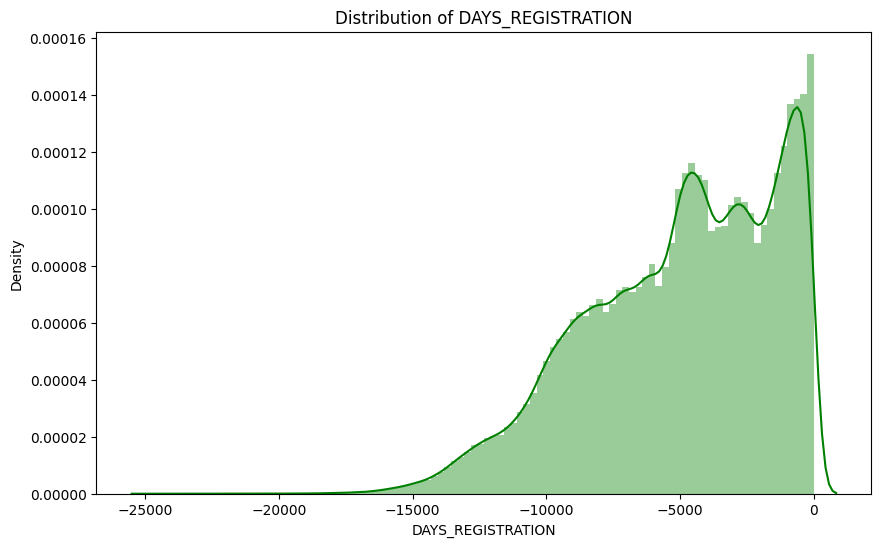

In [ ]:
plot_distribution('DAYS_REGISTRATION','green')

* Lệch Trái (Left-skewed): Đây là điều rõ ràng nhất. Hầu hết dữ liệu bị dồn về phía bên phải (gần mốc 0).
* * Tập trung gần mốc 0: Một lượng lớn khách hàng đã thay đổi đăng ký của họ rất gần với ngày họ nộp đơn vay. Có một đỉnh cao nhất ngay sát mốc 0.
* * Phân phối Đa đỉnh (Multimodal): Biểu đồ không mượt mà mà có nhiều đỉnh (gần 0, khoảng -5,000, khoảng -10,000). Điều này cho thấy có thể có nhiều nhóm khách hàng khác nhau -> dùng để phân nhóm để huấn luyện mô hình riêng cho từng nhóm.

Nhóm 1: Mới thay đổi đăng ký (gần 0).

Nhóm 2: Thay đổi đăng ký cách đây khoảng 5,000 ngày.

Nhóm 3: Có đăng ký rất cũ (đuôi dài bên trái).


Khi kết hợp hai điều trên, chúng ta rút ra được insight về rủi ro:

Tương quan ÂM có nghĩa là: Khi DAYS_REGISTRATION tăng (tức là đi từ -20,000 về 0), thì TARGET (rủi ro vỡ nợ) cũng có xu hướng tăng.

Nói một cách dễ hiểu:

Những khách hàng vừa mới thay đổi đăng ký (có giá trị DAYS_REGISTRATION gần 0) có rủi ro vỡ nợ cao hơn so với những khách hàng có đăng ký cũ và ổn định lâu năm (có giá trị âm lớn, ví dụ -15,000).

### Days ID publish distribution

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\2489922889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


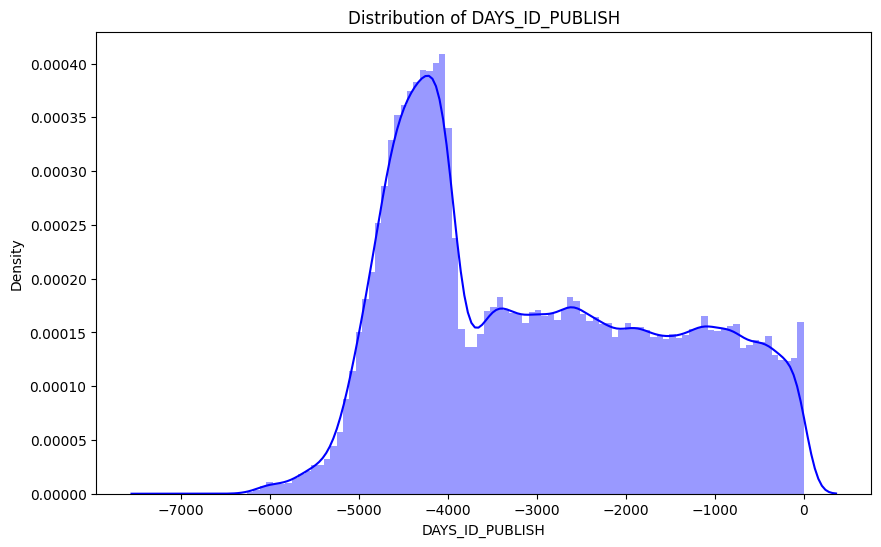

In [ ]:
plot_distribution('DAYS_ID_PUBLISH','blue')

* Biểu đồ "Distribution of DAYS_ID_PUBLISH" cho thấy sự phân bổ của thời điểm khách hàng thay đổi giấy tờ tùy thân:
* Phân phối Đa đỉnh có ít nhất 2 cụm rõ rệt:
* * Cụm 1: Một nhóm rất lớn khách hàng đã thay đổi ID của họ trong khoảng -4000 đến -5000 ngày trước (khoảng 11-14 năm trước). Tại sao lại có hiện tượng đó? Có sự kiện j xyax ra ở đay hk?
* * Cụm 2: Một nhóm lớn khác có sự thay đổi ID trải dài, tương đối ổn định trong khoảng từ -3000 ngày cho đến rất gần ngày nộp đơn (mốc 0).

So sánh các giá trị khoảng (interval values) theo TARGET = 1 và TARGET = 0

Hãy so sánh phân bố (distribution) của các biến dạng khoảng liên tục (interval values) — như tuổi, số ngày làm việc, thu nhập, tỷ lệ tài sản, v.v. — giữa hai nhóm khách hàng:

TARGET = 0: khách hàng đã hoàn trả khoản vay đúng hạn

TARGET = 1: khách hàng không hoàn trả khoản vay

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1276579204.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1276579204.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1276579204.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.k

<Figure size 640x480 with 0 Axes>

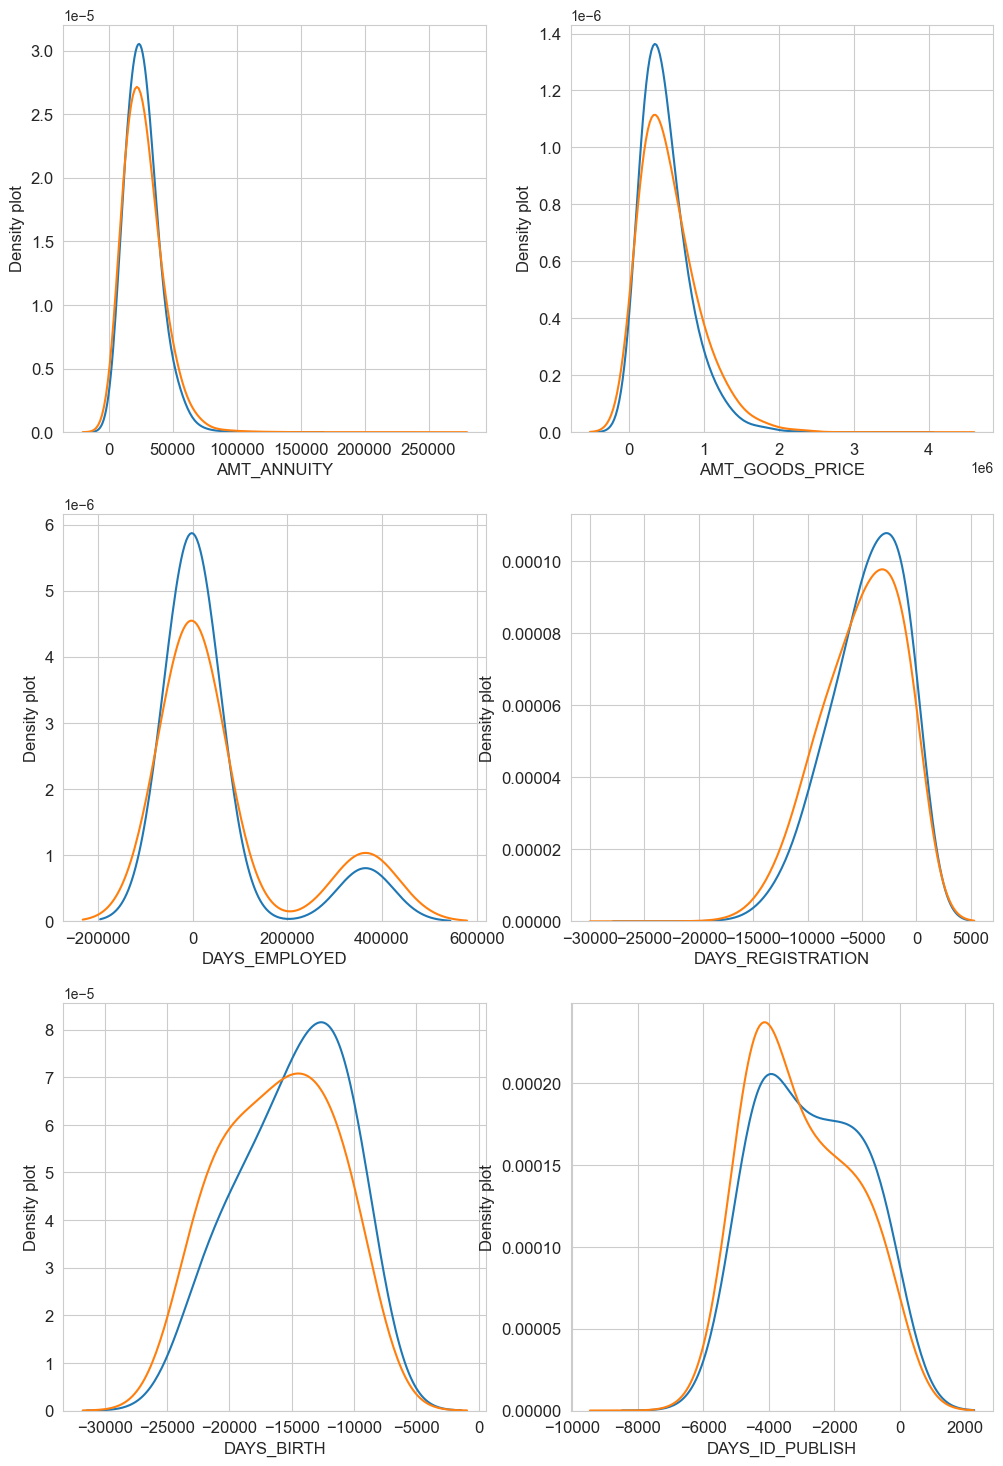

In [ ]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

### Region registered not live region and not work region
Hãy biểu diễn dữ liệu liên quan đến vùng đăng ký (region registered) của khách hàng so với:

Vùng sinh sống thực tế (not live region)

Vùng làm việc (not work region)

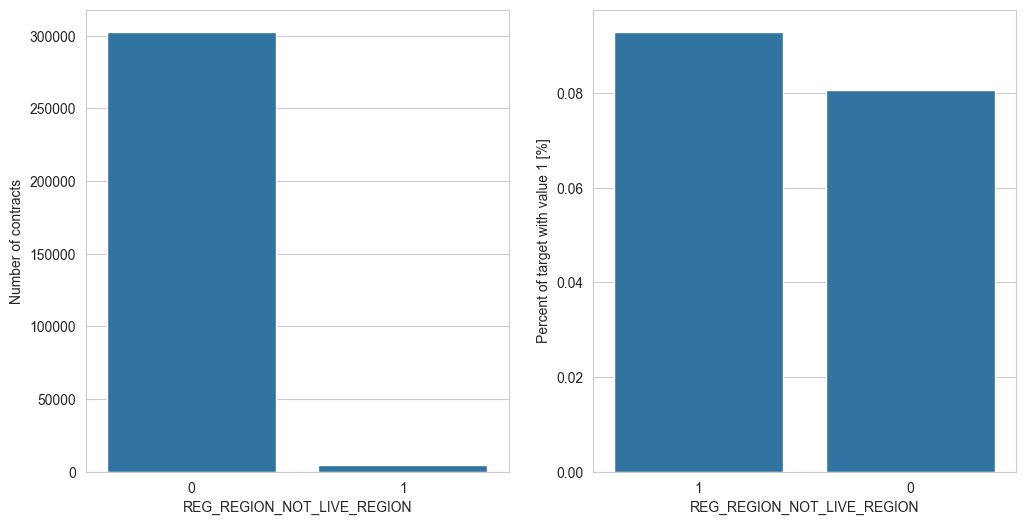

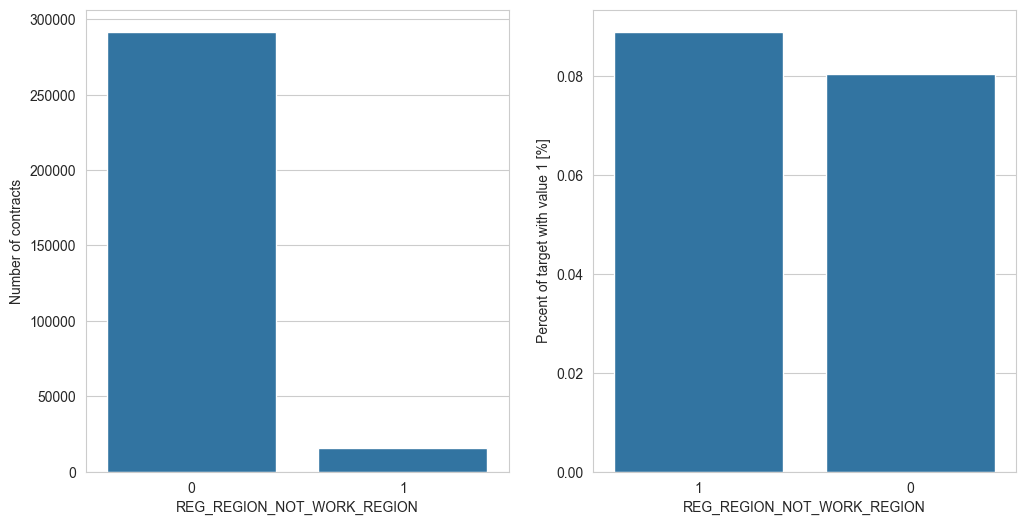

In [ ]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Rất ít khách hàng **đăng ký nơi cư trú hoặc nơi làm việc khác với vùng họ đang sống hoặc làm việc thực tế**.
Tuy nhiên, **tỷ lệ không hoàn trả khoản vay (not return)** ở những trường hợp này **cao hơn một chút**, khoảng **hơn 8%**, so với mức trung bình **xấp xỉ 8%** ở các khách hàng còn lại.

**Kết luận:**
Việc khách hàng **sống hoặc làm việc khác vùng đăng ký** không ảnh hưởng lớn đến khả năng trả nợ, nhưng vẫn có **mức rủi ro nhỉnh hơn một chút**, có thể do **tính ổn định nơi ở và việc làm thấp hơn**.


### City registered not live city and not work city


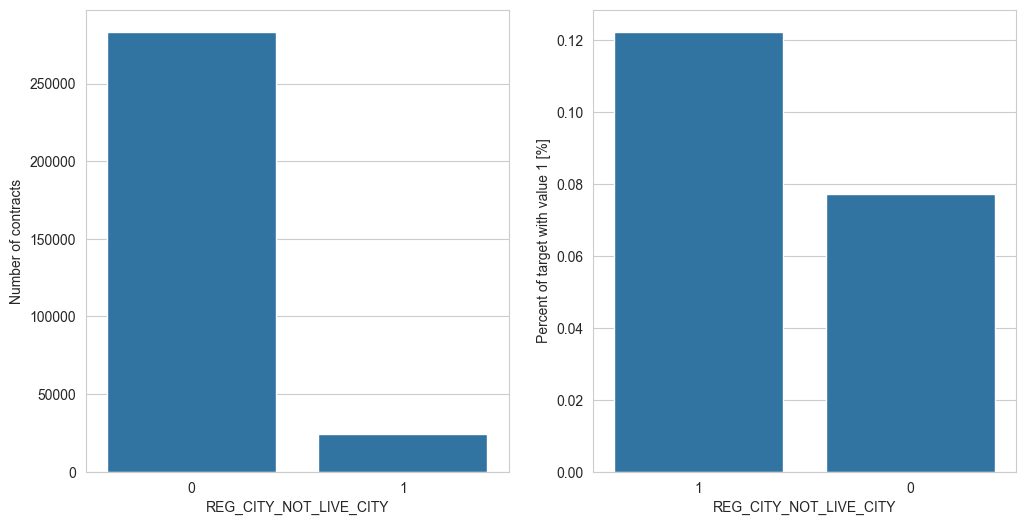

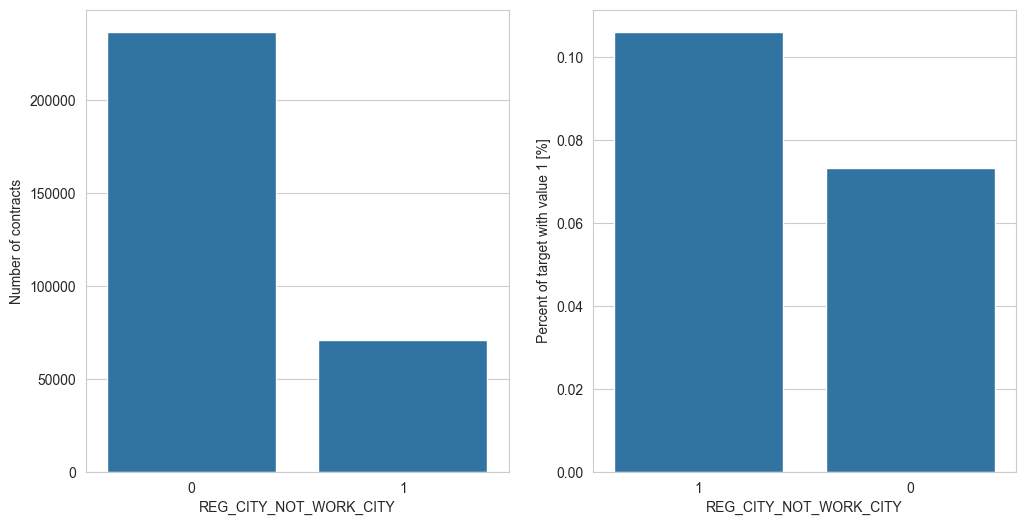

In [ ]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Nhìn chung, **phần lớn khách hàng đăng ký hộ khẩu tại cùng thành phố nơi họ sinh sống hoặc làm việc**.
Tuy nhiên, **số người đăng ký khác thành phố nơi làm việc** lại **nhiều hơn** so với số người **đăng ký khác thành phố nơi sinh sống**.

Xét về **khả năng hoàn trả khoản vay**, những khách hàng **đăng ký khác thành phố nơi họ sinh sống hoặc làm việc** có **tỷ lệ không trả nợ cao hơn đáng kể** — khoảng **11% đối với nhóm làm việc khác thành phố đăng ký** và **12% đối với nhóm sinh sống khác thành phố đăng ký**.

 **Kết luận:**
Việc **không cư trú hoặc làm việc tại cùng thành phố đăng ký hộ khẩu** có thể là **dấu hiệu của sự thiếu ổn định** (về nơi ở hoặc công việc), dẫn đến **rủi ro tín dụng cao hơn** so với những người **sống và làm việc trong cùng thành phố đăng ký**.

## Dữ liệu Bureau

Bộ dữ liệu Bureau chứa tất cả các khoản vay trước đây của khách hàng được cung cấp bởi các tổ chức tài chính khác, và được báo cáo lên trung tâm tín dụng (Credit Bureau).
Thông tin này chỉ áp dụng cho những khách hàng có hồ sơ vay trong tập dữ liệu mẫu.

Với mỗi khoản vay trong tập mẫu (application_train), sẽ có nhiều dòng dữ liệu tương ứng trong Bureau, tùy thuộc vào số lượng khoản vay mà khách hàng đó từng có tại các tổ chức tín dụng khác trước ngày nộp đơn vay hiện tại.

Khóa liên kết:
Biến SK_ID_CURR được sử dụng để kết nối dữ liệu giữa bảng
application_train (hoặc application_test) với bảng bureau.

Thao tác tiếp theo

Bây giờ, ta sẽ gộp (merge) hai bảng dữ liệu:
application_train và bureau,
thông qua khóa SK_ID_CURR, nhằm mục đích kết hợp thông tin khoản vay hiện tại với lịch sử vay tại các tổ chức tín dụng khác

In [ ]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [ ]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ",
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


Phân tích dữ liệu application_bureau_train

In [ ]:
def plot_b_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_bureau_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_bureau_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

### Credit status
Ta sẽ xem phân bố số lượng khoản vay theo từng loại trạng thái tín dụng (credit status) trong dữ liệu application_bureau_train.

Các trạng thái phổ biến bao gồm:

Closed → Khoản vay đã tất toán (đóng).

Active → Khoản vay vẫn đang hoạt động (chưa trả xong).

Sold → Khoản vay đã được bán lại cho một tổ chức tài chính khác.

Bad debt → Khoản vay bị nợ xấu (không thể thu hồi)

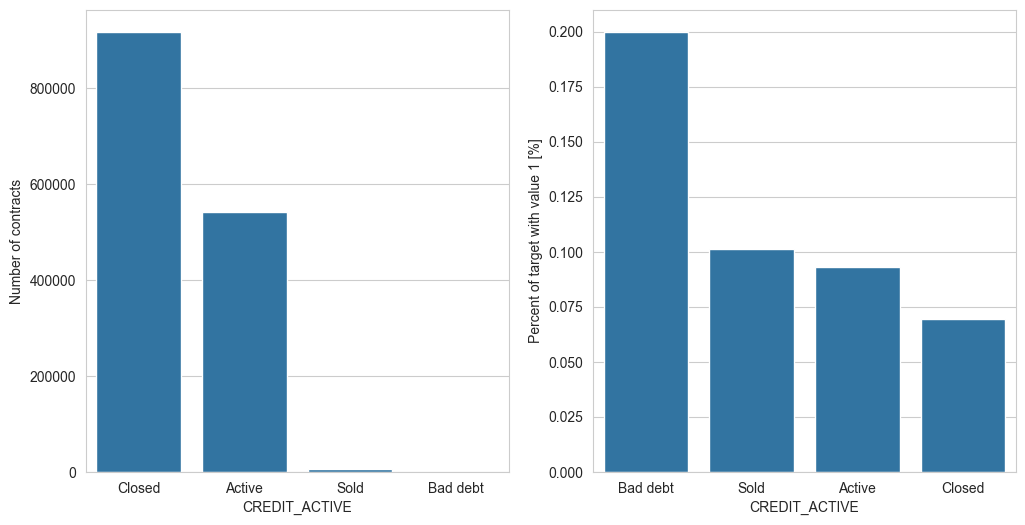

In [ ]:
plot_b_stats('CREDIT_ACTIVE')

Phần lớn các khoản vay được ghi nhận trong **Credit Bureau** có trạng thái **Closed (đã tất toán)**, với khoảng **900.000 khoản vay**.
Đứng thứ hai là **Active (đang hoạt động)**, với **chưa đến 600.000 khoản vay**.
Hai trạng thái còn lại — **Sold** và **Bad debt** — xuất hiện với **số lượng rất ít**.

Xét về **tỷ lệ khách hàng có khoản vay hiện tại bị vỡ nợ (TARGET = 1)** trong từng nhóm:

* Những khách hàng có **lịch sử nợ xấu (Bad debt)** trong Credit Bureau có **tỷ lệ vỡ nợ cao nhất – khoảng 20%**.
* Các nhóm **Sold**, **Active** và **Closed** đều có **tỷ lệ vỡ nợ bằng hoặc thấp hơn mức trung bình 10%**.
* Trong đó, **nhóm Closed** (từng tất toán khoản vay trước đây) có **tỷ lệ vỡ nợ thấp nhất**.

**Kết luận:**
Lịch sử tín dụng trước đây (được ghi nhận tại Credit Bureau) là **một chỉ báo mạnh cho rủi ro tín dụng hiện tại**.
Khách hàng từng có **nợ xấu (Bad debt)** có khả năng vỡ nợ cao gấp **2 lần** so với nhóm **Sold/Active**, và gần **3 lần** so với nhóm **Closed**.
Điều này cho thấy việc **phân tích dữ liệu Credit Bureau** giúp **mô hình dự đoán rủi ro tín dụng chính xác hơn**, vì hành vi tài chính trong quá khứ **phản ánh rõ xu hướng tín dụng hiện tại**.


### Credit currency

Kiểm tra số lượng khoản vay được ghi nhận tại Credit Bureau theo đơn vị tiền tệ khác nhau, và đồng thời xem tỷ lệ vỡ nợ (TARGET = 1) trong các hồ sơ vay hiện tại, tương ứng với loại tiền tệ của các khoản vay trước đó.

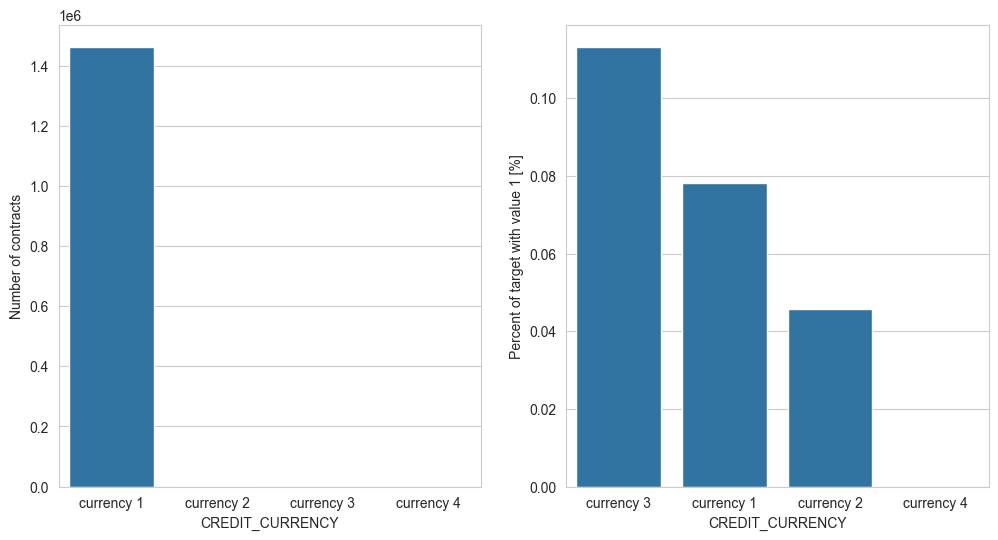

In [ ]:
plot_b_stats('CREDIT_CURRENCY')

Phần lớn các khoản vay trong **Credit Bureau** được ghi nhận bằng **currency_1** (đơn vị tiền tệ chính, thường là nội tệ).

Tuy nhiên, **tỷ lệ khách hàng vỡ nợ (default)** lại **khác nhau rõ rệt tùy theo loại tiền tệ**:

* **currency_3:** có **tỷ lệ vỡ nợ cao nhất – khoảng 11%**,
* **currency_1:** ở mức **trung bình – khoảng 8%**,
* **currency_2:** thấp hơn, **khoảng 5%**,
* **currency_4:** gần như **0%** vỡ nợ.

**Kết luận:**
Loại tiền tệ của các khoản vay trước đây có thể là **một yếu tố phản ánh mức độ rủi ro tín dụng**.

* Các khách hàng từng vay bằng **currency_3** có xu hướng **rủi ro cao hơn** đáng kể.
* Ngược lại, **currency_2** và đặc biệt là **currency_4** thể hiện **rủi ro rất thấp**, có thể do **loại khách hàng hoặc tổ chức cho vay đặc thù, uy tín hoặc có bảo đảm cao hơn**.


### Credit type

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\211902556.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\211902556.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


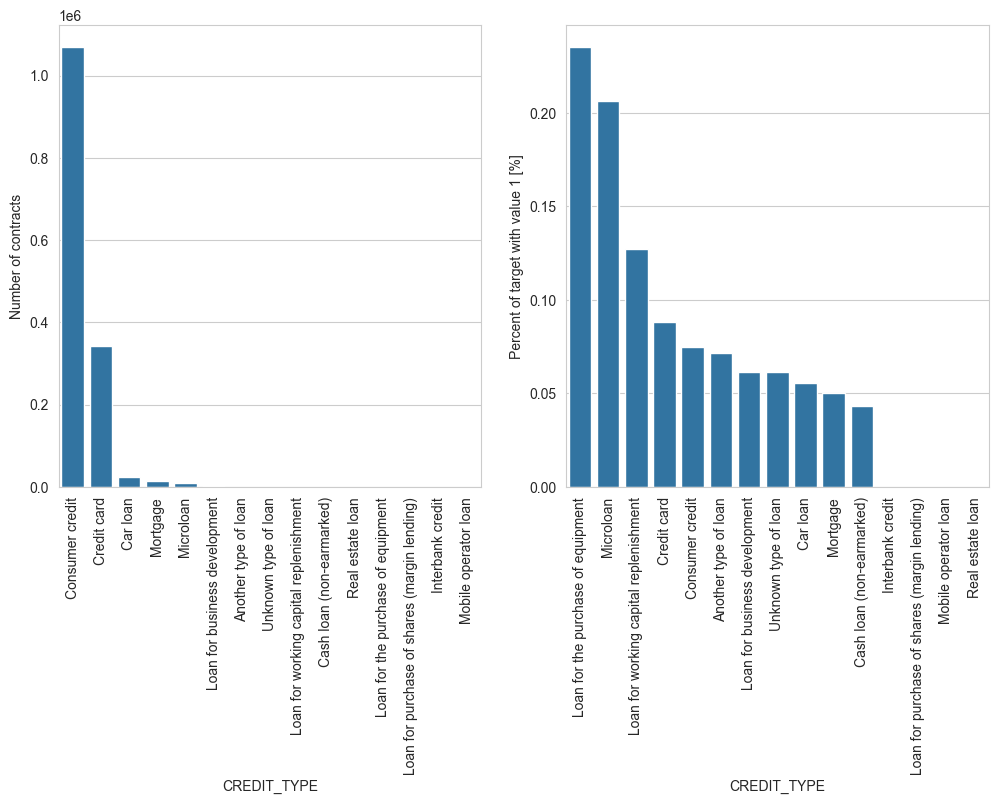

In [ ]:
plot_b_stats('CREDIT_TYPE', True, True)

Phần lớn các khoản vay trong **lịch sử tín dụng tại Credit Bureau** thuộc loại **Consumer credit (vay tiêu dùng)** và **Credit card (thẻ tín dụng)**.
Một số loại khác như **Car loan (vay mua xe)**, **Mortgage (vay thế chấp nhà)** và **Microloan (vay vi mô)** xuất hiện với **số lượng ít hơn đáng kể**.

Khi xem xét **tỷ lệ vỡ nợ hiện tại (TARGET = 1)** theo **loại khoản vay trong lịch sử**, có một vài loại thể hiện **mức rủi ro đặc biệt cao**, bao gồm:

* **Loan for the purchase of equipment (vay mua thiết bị)** → **hơn 20%** khoản vay hiện tại bị vỡ nợ,
* **Microloan (vay vi mô)** → **hơn 20%** khoản vay hiện tại bị vỡ nợ,
* **Loan for working capital replenishment (vay bổ sung vốn lưu động)** → **trên 12%** khoản vay hiện tại bị vỡ nợ.

**Kết luận:**
Một số loại khoản vay trong lịch sử — đặc biệt là **vay mua thiết bị**, **vay vi mô**, và **vay bổ sung vốn lưu động** — có thể được xem là **chỉ báo mạnh về rủi ro tín dụng** cho các khoản vay hiện tại.
Điều này cho thấy **loại hình tín dụng mà khách hàng từng sử dụng trong quá khứ** có **mối liên hệ chặt chẽ với hành vi trả nợ ở hiện tại**, và nên được **đưa vào mô hình dự đoán rủi ro (credit scoring model)** như **một biến đặc trưng quan trọng**.


### Duration of credit (DAYS_CREDIT)


C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1959872726.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)


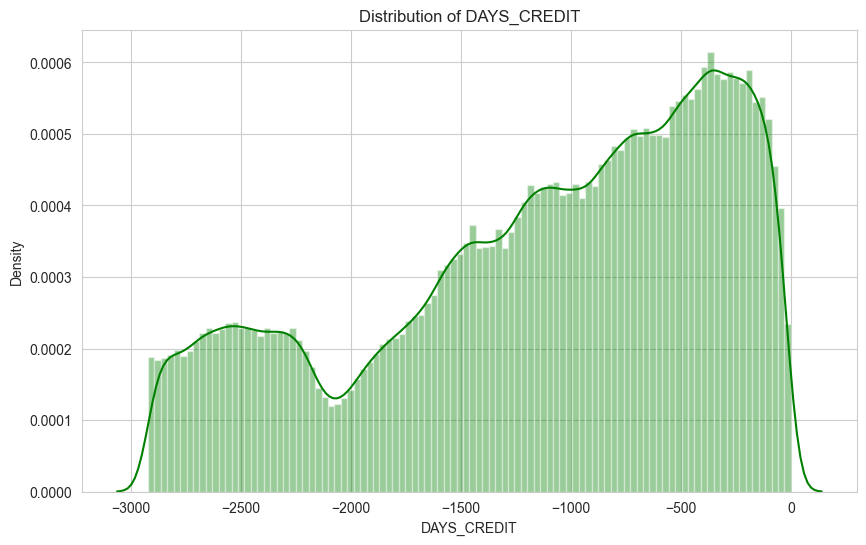

In [ ]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

plot_b_distribution('DAYS_CREDIT','green')

Thời gian vay (**credit duration**, tính bằng ngày) dao động trong khoảng **dưới 3000 ngày**, tương đương **gần 8 năm**.

Phân bố cho thấy:

* Có một **điểm trũng nhẹ (local saddle)** quanh **2000 ngày**,
* **Tần suất xuất hiện tăng dần** khi **thời hạn vay ngắn hơn**,
* Và **đạt đỉnh (peak)** quanh **300 ngày**, tức là **các khoản vay ngắn hạn (dưới 1 năm)** chiếm tỷ trọng lớn nhất.

**Kết luận:**
Phần lớn các khoản vay được ghi nhận tại Credit Bureau là **vay ngắn hạn**, trong khi **vay dài hạn (trên 5 năm)** chiếm tỷ lệ nhỏ hơn nhiều.
Điều này phản ánh xu hướng khách hàng **ưu tiên vay tiêu dùng hoặc tín dụng quay vòng ngắn hạn**, thay vì các khoản vay dài hạn như **thế chấp hoặc đầu tư tài sản lớn**.


### Credit overdue (CREDIT_DAY_OVERDUE)

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1959872726.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)


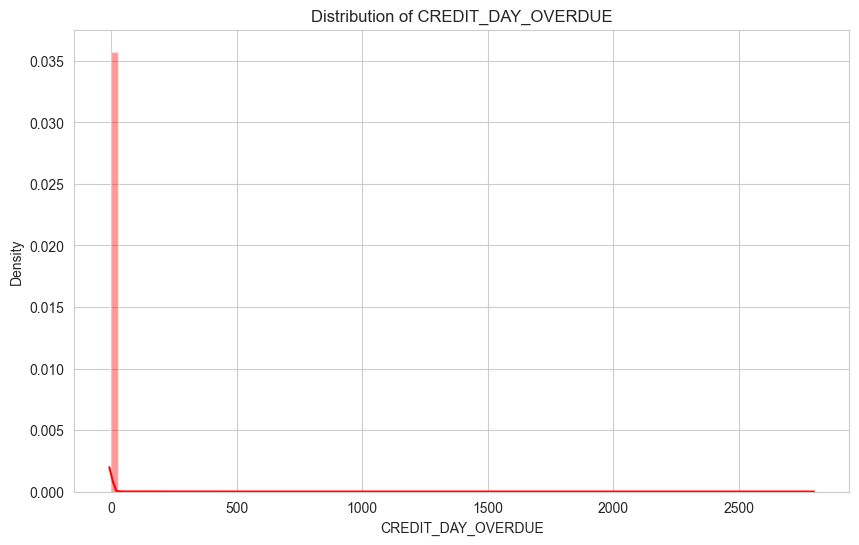

In [ ]:
plot_b_distribution('CREDIT_DAY_OVERDUE','red')

Phần lớn các khoản vay có số ngày trễ hạn (days overdue) là 0 hoặc gần bằng 0, cho thấy đa số khách hàng thanh toán đúng hạn.

Tuy nhiên, một số ít trường hợp ngoại lệ có số ngày trễ hạn tối đa lên đến khoảng 3000 ngày (tức gần 8 năm), thể hiện những khoản vay bị quá hạn nghiêm trọng và có thể được xếp vào nhóm nợ xấu kéo dài.

Kết luận:

Đa số khoản vay: không có dấu hiệu trễ hạn → phản ánh nhóm khách hàng có lịch sử tín dụng tốt.

Một số rất ít khoản vay: có số ngày trễ hạn cực cao, cần được xem xét kỹ trong đánh giá rủi ro, vì đây là chỉ báo mạnh của hành vi không trả nợ trong tương lai.

### Credit sum  (AMT_CREDIT_SUM)

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1959872726.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)


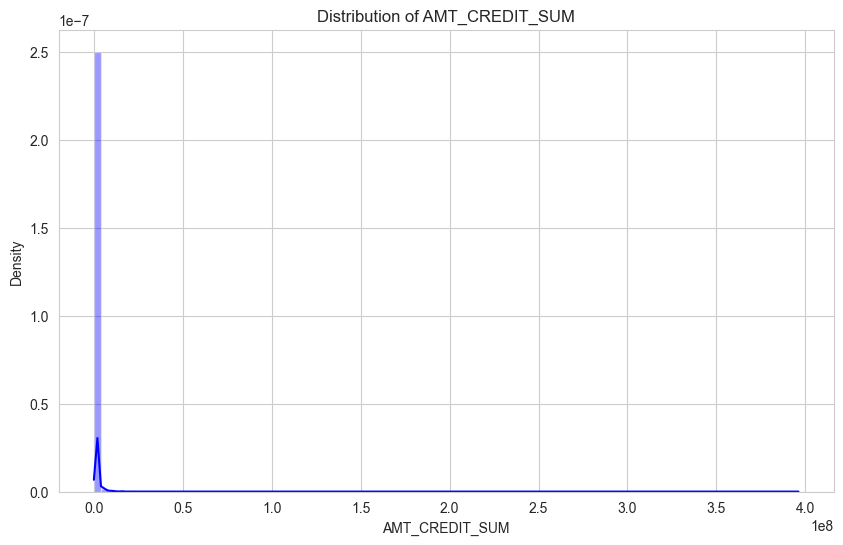

In [ ]:
plot_b_distribution('AMT_CREDIT_SUM','blue')

Phân bố của **AMT_CREDIT_SUM** (tổng số tiền vay) cho thấy **các khoản vay tập trung chủ yếu ở mức giá trị thấp**.

Hãy **loại bỏ các giá trị ngoại lai (outliers)** để có thể **quan sát rõ hơn phân bố dữ liệu xung quanh giá trị gần 0**.

Tiếp theo, ta sẽ **tạo một hàm để xác định và lọc bỏ các giá trị ngoại lai**, với **ngưỡng (threshold)** được xác định trước.

Sau đó, ta sẽ **chỉnh sửa lại hàm này** để **hiển thị biểu đồ phân bố (distribution)** — lần này **sử dụng chính hàm lọc ngoại lai** vừa tạo.


C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1208809298.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered, color=color, kde=True, bins=100)


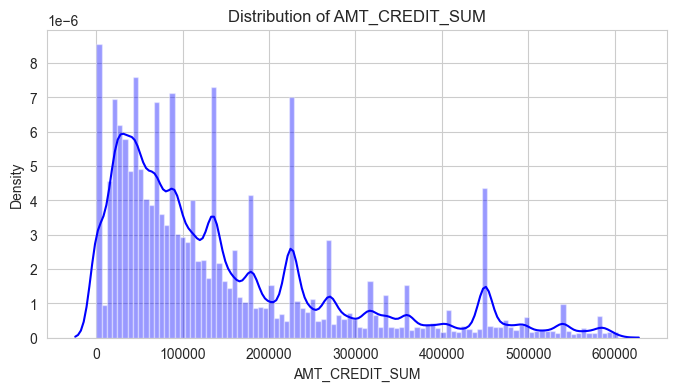

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def is_outlier(points, thresh=3.5):
    """
    Trả về mảng bool: True nếu là outlier theo Modified Z-score.
    """
    points = np.asarray(points)            # chuyển sang numpy array
    if points.ndim == 1:
        points = points[:, None]           # (n, 1)

    median = np.median(points, axis=0)
    diff = np.sqrt(np.sum((points - median)**2, axis=-1))
    med_abs_deviation = np.median(diff)

    # Tránh chia cho 0 nếu tất cả giá trị giống nhau
    if med_abs_deviation == 0:
        modified_z_score = np.zeros_like(diff)
    else:
        modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh


def plot_b_o_distribution(feature, color="blue"):
    plt.figure(figsize=(8,4))
    plt.title(f"Distribution of {feature}")
    x = application_bureau_train[feature].dropna()

    mask = ~is_outlier(x)                  # mask numpy bool cùng chiều
    filtered = x[mask]                     # áp mask vào Series

    # distplot đã deprecated; vẫn chạy được nhưng nên dùng histplot/kdeplot
    sns.distplot(filtered, color=color, kde=True, bins=100)
    plt.show()

plot_b_o_distribution('AMT_CREDIT_SUM', 'blue')


Ta có thể quan sát rằng **hàm phân bố (distribution function)** của **AMT_CREDIT_SUM** cho thấy **nhiều đỉnh (peaks)** trong dữ liệu.
Mức **tập trung cao nhất (đỉnh chính)** nằm quanh **20.000**, tức là **phần lớn khoản vay có giá trị nhỏ**, nhưng đồng thời cũng có **nhiều đỉnh nhỏ khác ở các giá trị cao hơn**.

 **Kết luận:**
Phân bố không hoàn toàn đồng nhất — dữ liệu thể hiện **sự tập trung mạnh ở các khoản vay nhỏ**, trong khi **vẫn tồn tại các cụm giá trị cao**, có thể đại diện cho **các khoản vay đặc thù hoặc các nhóm khách hàng khác nhau** (ví dụ: vay tiêu dùng nhỏ so với vay đầu tư lớn).


### Credit sum limit (AMT_CREDIT_SUM_LIMIT)

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\1959872726.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)


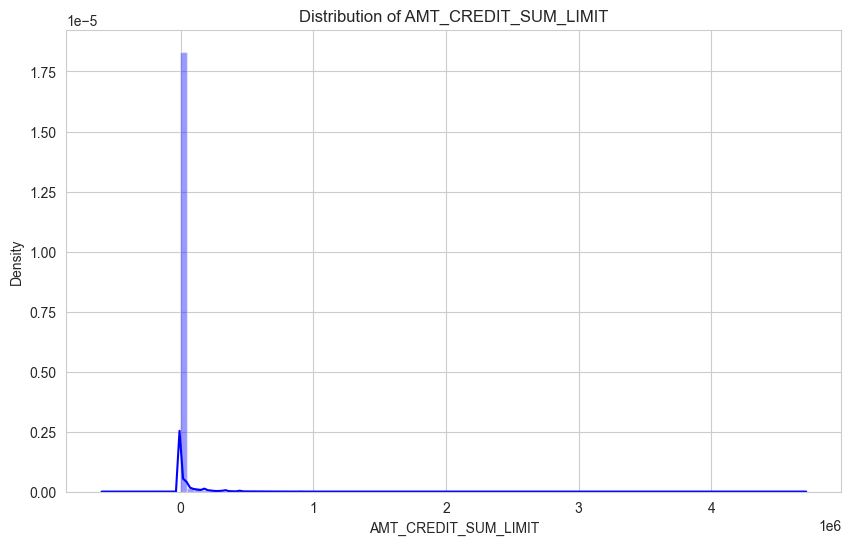

In [ ]:
plot_b_distribution('AMT_CREDIT_SUM_LIMIT','blue')

### Comparison of interval values with TARGET = 1 and TARGET = 0

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):

    i = 0
    t1 = application_bureau_train.loc[application_bureau_train['TARGET'] != 0]
    t0 = application_bureau_train.loc[application_bureau_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\3226276586.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\3226276586.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\3226276586.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.k

<Figure size 640x480 with 0 Axes>

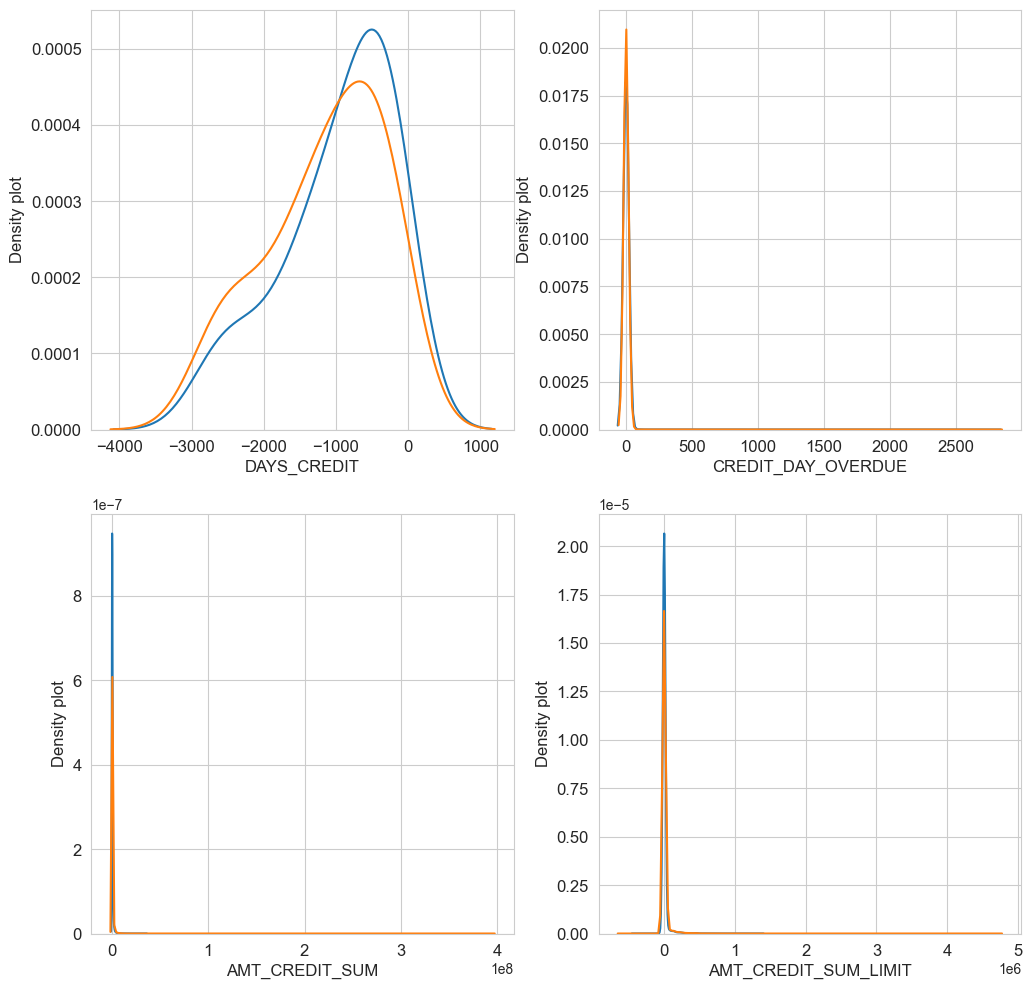

In [ ]:
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']

plot_b_distribution_comp(var, nrow=2)

## Previous application data

Bảng dữ liệu previous_application chứa thông tin về tất cả các hồ sơ vay trước đây tại Home Credit của những khách hàng đang có khoản vay trong tập dữ liệu mẫu.
Mỗi dòng trong bảng tương ứng với một hồ sơ vay trước đó của khách hàng.

Khóa liên kết:
Biến SK_ID_CURR được sử dụng để kết nối dữ liệu giữa các bảng
application_train (hoặc application_test) với bảng previous_application.

Mục tiêu tiếp theo

Ta sẽ gộp (merge) hai bảng dữ liệu application_train và previous_application
để kết hợp thông tin của khoản vay hiện tại với các khoản vay trước đó tại Home Credit của cùng khách hàn

In [ ]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [ ]:
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ",
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  1413701  rows and  158  columns.


In [ ]:
def plot_p_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_prev_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_prev_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

<a href="#0"><font size="1">Go to top</font></a>


## <a id="44">Contract type</a>


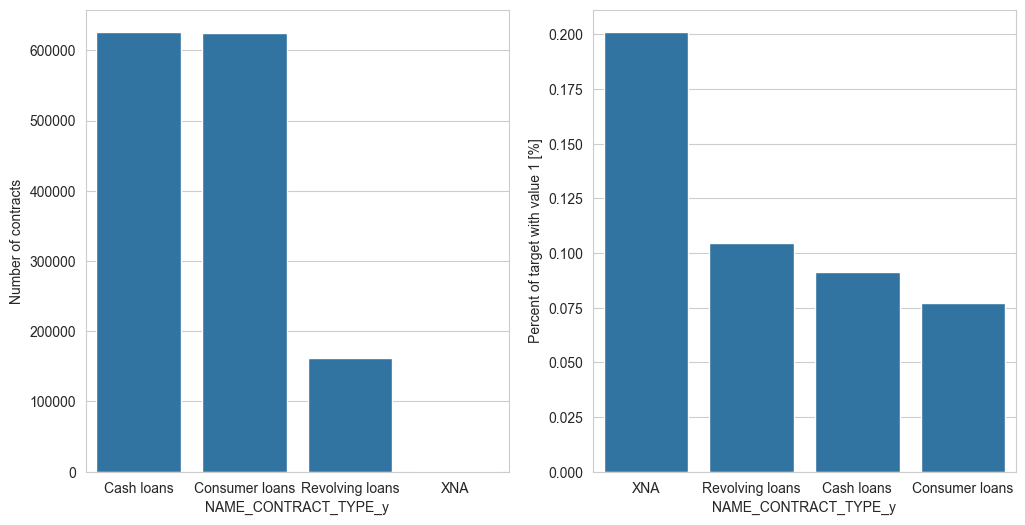

In [ ]:
plot_p_stats('NAME_CONTRACT_TYPE_y')

Trong dữ liệu **previous applications**, có ba loại hợp đồng vay chính:

* **Cash loans** – vay tiền mặt
* **Consumer loans** – vay tiêu dùng
* **Revolving loans** – vay quay vòng

Hai loại **Cash loans** và **Consumer loans** có **số lượng gần như tương đương (~600.000 hồ sơ mỗi loại)**, trong khi **Revolving loans** có khoảng **150.000 hồ sơ** — ít hơn đáng kể.

Xét về **tỷ lệ vỡ nợ (default)** trong **các khoản vay hiện tại**, ta thấy sự khác biệt rõ rệt theo loại hợp đồng vay trong quá khứ:

* **Revolving loans:** ~**10%** khách hàng hiện tại bị vỡ nợ
* **Cash loans:** ~**9,5%**
* **Consumer loans:** ~**8%**

**Kết luận:**
Những khách hàng có **lịch sử vay quay vòng (Revolving loans)** trong quá khứ có **nguy cơ vỡ nợ cao nhất** trong các khoản vay hiện tại, có thể do **tính chất linh hoạt và rủi ro cao của loại tín dụng này**.
Ngược lại, **vay tiêu dùng (Consumer loans)** thể hiện **mức độ rủi ro thấp nhất**, cho thấy nhóm khách hàng này **có hành vi tín dụng ổn định hơn và khả năng trả nợ tốt hơn**.


### Cash loan purpose


C:\Users\pc\AppData\Local\Temp\ipykernel_17476\640045915.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\640045915.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


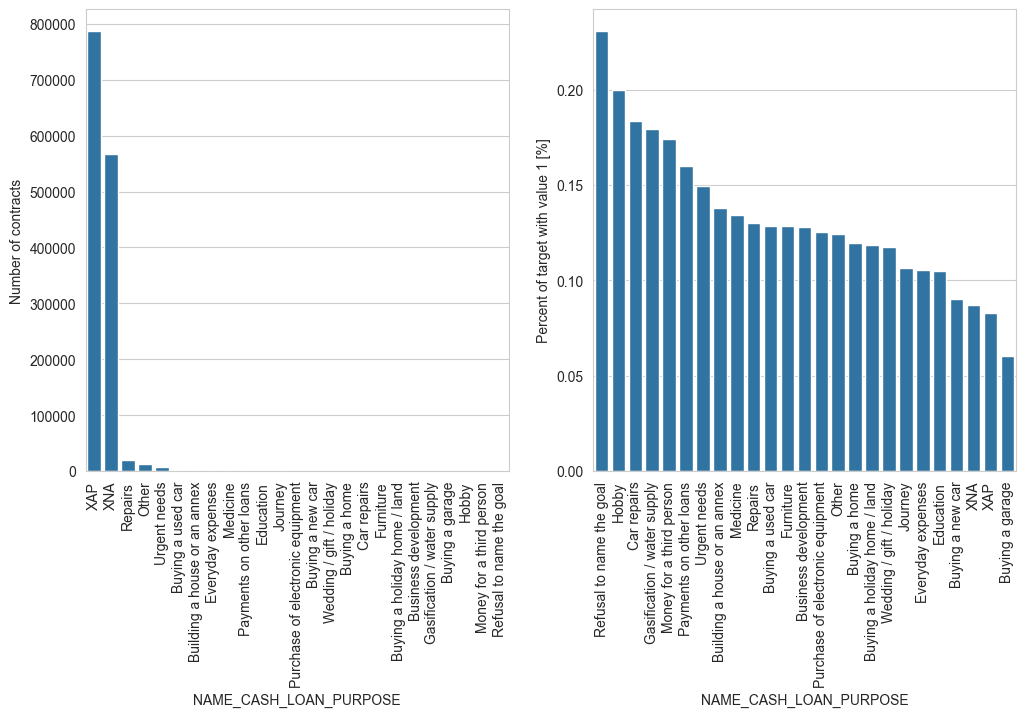

In [ ]:
plot_p_stats('NAME_CASH_LOAN_PURPOSE', True, True)

Ngoài các nhóm **không xác định / không có thông tin (Not identified / Not available)**, các mục đích vay phổ biến nhất trong **các hồ sơ vay trước đây (previous applications)** bao gồm:

* **Repairs (sửa chữa)**,
* **Other (khác)**,
* **Urgent needs (nhu cầu khẩn cấp)**,
* **Buying a used car (mua xe cũ)**,
* **Building a house or an annex (xây nhà hoặc công trình phụ)**.

Xét về **tỷ lệ vỡ nợ (default)** trong **các khoản vay hiện tại**, đối với khách hàng có **lịch sử vay trước đó**, các nhóm có **rủi ro cao nhất** là:

* **Refusal to name the goal (từ chối khai báo mục đích vay)** – **~23%**,
* **Hobby (giải trí / sở thích cá nhân)** – **~20%**,
* **Car repairs (sửa xe)** – **~18%**.

 **Kết luận:**
Những khách hàng có **hồ sơ vay trước đây cho các mục đích không rõ ràng hoặc mang tính cá nhân** (như *Refusal to name the goal* hay *Hobby*) **có rủi ro tín dụng cao hơn nhiều**.
Điều này hoàn toàn hợp lý, vì **mục đích vay không minh bạch hoặc phi thiết yếu** thường **không gắn liền với khả năng sinh lợi hoặc ổn định tài chính**, dẫn đến **nguy cơ không hoàn trả khoản vay cao hơn**.


### Contract status

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\640045915.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\640045915.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


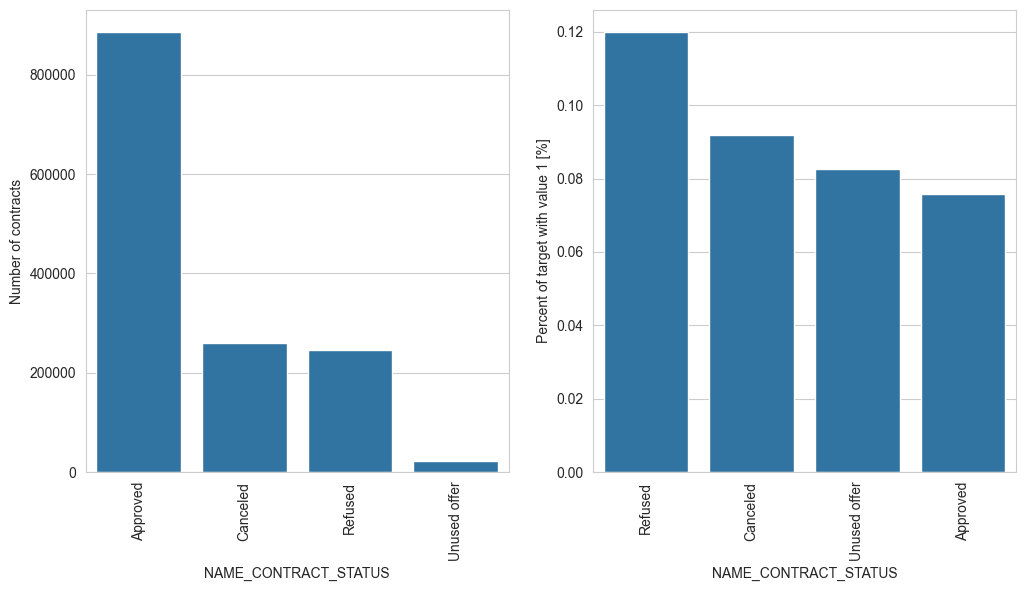

In [ ]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

Phần lớn các **hợp đồng vay trước đây (previous applications)** có trạng thái **Approved (được phê duyệt)** — khoảng **850.000 hồ sơ**.
Các trạng thái **Canceled (hủy)** và **Refused (từ chối)** có khoảng **240.000 hồ sơ**, trong khi **Unused offer (đề nghị không sử dụng)** chỉ khoảng **20.000**.

Xét về **tỷ lệ vỡ nợ (default)** trong **các khoản vay hiện tại**, đối với khách hàng có **lịch sử vay trước đó**, ta thấy:

* Nhóm có **hồ sơ từng bị Refused** có **tỷ lệ vỡ nợ cao nhất (~12%)**,
* Tiếp theo là nhóm **Canceled** với **~9%**,
* **Unused offer** khoảng **~8%**,
* Và **Approved** có **tỷ lệ thấp nhất, dưới 8%**.

**Kết luận:**
Trạng thái hợp đồng trong lịch sử tín dụng là **một yếu tố dự báo quan trọng cho rủi ro hiện tại**.
Khách hàng từng **bị từ chối (Refused)** hoặc **hủy đơn vay (Canceled)** có xu hướng **vỡ nợ cao hơn** trong các khoản vay mới, trong khi **những người từng được phê duyệt (Approved)** thường **có lịch sử tín dụng tốt và ít rủi ro hơn**.


### Payment type

Let's check the payment type.

C:\Users\pc\AppData\Local\Temp\ipykernel_17476\640045915.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\pc\AppData\Local\Temp\ipykernel_17476\640045915.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


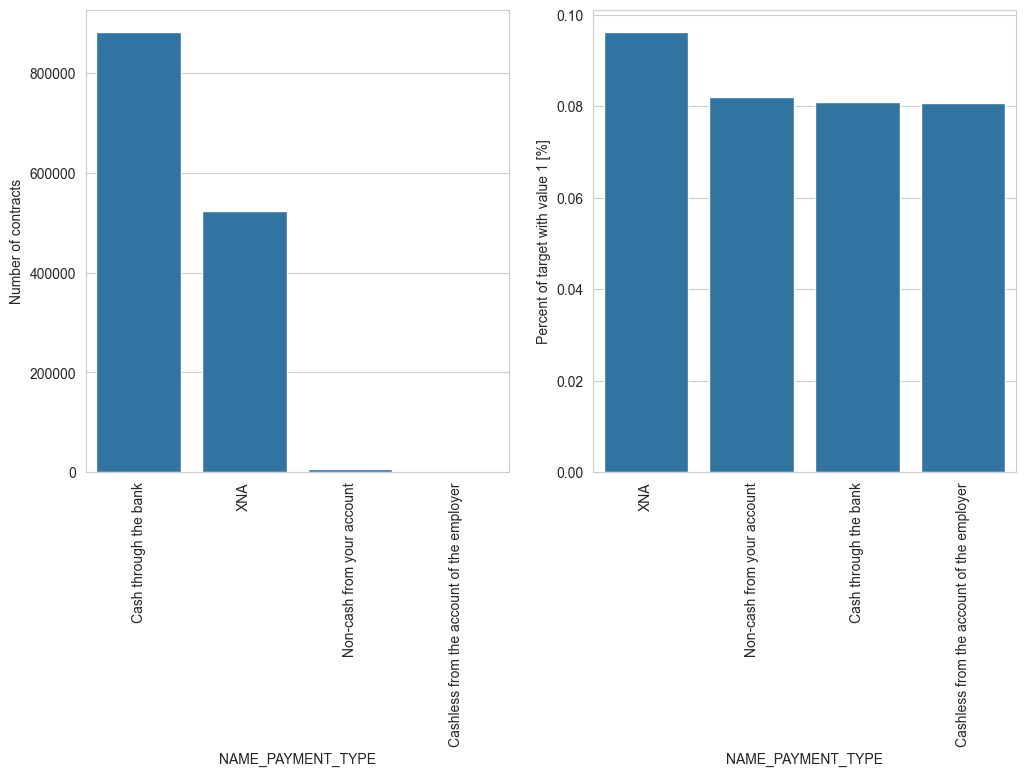

In [ ]:
plot_p_stats('NAME_PAYMENT_TYPE', True, True)

Phần lớn các **khoản vay trước đây** được **thanh toán bằng tiền mặt qua ngân hàng (*Cash through the bank*)**, với khoảng **850.000 giao dịch**.
Các hình thức thanh toán khác như **Non-cash from your account** (chuyển khoản từ tài khoản cá nhân) và **Cashless from the account of the employer** (chuyển khoản không dùng tiền mặt từ tài khoản của công ty hoặc người sử dụng lao động) **xuất hiện rất ít**.

Về **tỷ lệ vỡ nợ (default) của các khoản vay hiện tại**, những khách hàng có lịch sử sử dụng **bất kỳ hình thức thanh toán nào trong ba loại trên** đều có **tỷ lệ vỡ nợ gần như tương đương (~8%)**.

**Kết luận:**
Hình thức thanh toán trong các khoản vay trước đây **không tạo ra khác biệt đáng kể** trong rủi ro tín dụng hiện tại.
Dù là **thanh toán bằng tiền mặt hay chuyển khoản**, tỷ lệ vỡ nợ trung bình của các khách hàng hiện tại **vẫn dao động quanh mức 8%**.


### Client type

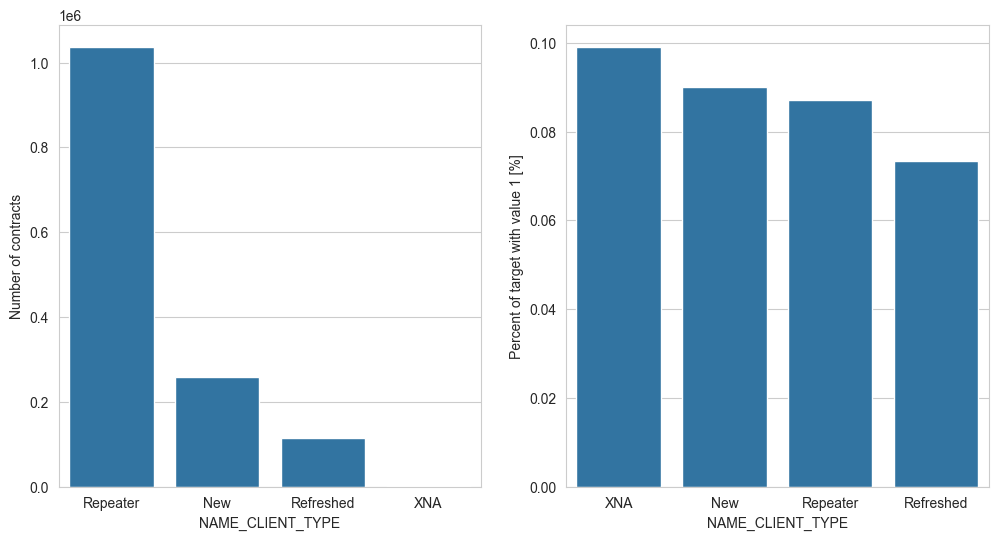

In [ ]:
plot_p_stats('NAME_CLIENT_TYPE')

Phần lớn các **hồ sơ vay trước đây (previous applications)** thuộc nhóm **khách hàng loại *Repeater*** — khoảng **1 triệu hồ sơ**.
Khoảng **200.000 hồ sơ** thuộc nhóm **New (khách hàng mới)** và **100.000 hồ sơ** là **Refreshed (khách hàng tái vay sau khi cập nhật hồ sơ)**.

Xét về **tỷ lệ vỡ nợ (default) trong các khoản vay hiện tại**, đối với **những khách hàng có lịch sử vay trước đó**, ta thấy:

* Nhóm **New** có **tỷ lệ vỡ nợ ~8,5%**,
* Nhóm **Repeater** có **~8,25%**,
* Nhóm **Refreshed** có **~7%**.

**Kết luận:**
Khách hàng **Repeater** và **Refreshed** (từng vay trước đó) có xu hướng **rủi ro tín dụng thấp hơn** so với **khách hàng hoàn toàn mới (New)**.
Điều này gợi ý rằng **kinh nghiệm vay và lịch sử tín dụng tốt trong quá khứ** có thể giúp **giảm khả năng vỡ nợ trong các khoản vay hiện tại**.
